## Import libraries and read in .csv file
We first need to import Python libraries that will be used with our data analyses and load in the deaths by jurisdiction and cause csv file.

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from IPython.display import display

%matplotlib inline

data = pd.read_csv('Weekly_counts_of_death_by_jurisdiction_and_cause_of_death.csv', low_memory=False)
data.head()

,Jurisdiction,Week Ending Date,State Abbreviation,Year,Week,Cause Group,Number of Deaths,Cause Subgroup,Time Period,Suppress,Note,Average Number of Deaths in Time Period,Difference from 2015-2019 to 2020,Percent Difference from 2015-2019 to 2020,Type
0,Alabama,2015-01-10,AL,2015,1,Alzheimer disease and dementia,120.0,Alzheimer disease and dementia,2015-2019,NaN,NaN,103,NaN,NaN,Predicted (weighted)
1,Alabama,2015-01-10,AL,2015,1,Alzheimer disease and dementia,120.0,Alzheimer disease and dementia,2015-2019,NaN,NaN,103,NaN,NaN,Unweighted
2,Alabama,2016-01-09,AL,2016,1,Alzheimer disease and dementia,76.0,Alzheimer disease and dementia,2015-2019,NaN,NaN,103,NaN,NaN,Predicted (weighted)
3,Alabama,2016-01-09,AL,2016,1,Alzheimer disease and dementia,76.0,Alzheimer disease and dementia,2015-2019,NaN,NaN,103,NaN,NaN,Unweighted
4,Alabama,2017-01-07,AL,2017,1,Alzheimer disease and dementia,96.0,Alzheimer disease and dementia,2015-2019,NaN,NaN,103,NaN,NaN,Predicted (weighted)


## Data cleanup
### Drop uneeded columns
Lets drop all of the columns that will not be needed in our data analyses. We are interested in Jurisdiction, Year, and Cause Group so we will drop every other column.

In [2]:
data.drop('Week Ending Date', axis = 1, inplace = True)
data.drop('State Abbreviation', axis = 1, inplace = True)
data.drop('Week', axis = 1, inplace = True)
data.drop('Cause Subgroup', axis = 1, inplace = True)
data.drop('Time Period', axis = 1, inplace = True)
data.drop('Suppress', axis = 1, inplace = True)
data.drop('Note', axis = 1, inplace = True)
data.drop('Average Number of Deaths in Time Period', axis = 1, inplace = True)
data.drop('Difference from 2015-2019 to 2020', axis = 1, inplace = True)
data.drop('Percent Difference from 2015-2019 to 2020', axis = 1, inplace = True)
data.drop('Type', axis = 1, inplace = True)

We will check for missing values and handle them.

In [3]:
# Check for missing values
data.isnull().sum()

Jurisdiction         0
Year                 0
Cause Group          0
Number of Deaths    34
dtype: int64

There is 34 null values in Number of Deaths column. Null values of number of deaths don't do us any good so we will handle it by dropping these 34 rows.

In [4]:
# Drop null values in Number of Deaths column
data = data.dropna(subset = ["Number of Deaths"])
data.isnull().sum()

Jurisdiction        0
Year                0
Cause Group         0
Number of Deaths    0
dtype: int64

In [5]:
# Check for strange values
data.describe()

,Year,Number of Deaths
count,329954.000000,329954.000000
mean,2017.513023,157.655537
std,1.708582,682.315818
min,2015.000000,11.000000
25%,2016.000000,23.000000
50%,2018.000000,44.000000
75%,2019.000000,95.000000
max,2020.000000,12433.000000


Since the data looks good, we will change the column names to something that is easier to understand and that will match the incoming datasets we will be working with.

In [6]:
data.columns = ['State/territory', 'Year', 'CauseGroup', 'NumberOfDeaths']

Lets check the data types and convert any incorrect data types.

In [7]:
data.dtypes

State/territory     object
Year                 int64
CauseGroup          object
NumberOfDeaths     float64
dtype: object

NumberOfDeaths is a float and should be an int so lets convert it from float to int.

In [8]:
data = data.astype({'NumberOfDeaths':'int'})
data.dtypes

State/territory    object
Year                int64
CauseGroup         object
NumberOfDeaths      int64
dtype: object

## Data Analyses
### Seperate data by year
The data needs to be seperated by year so we can analyze deaths per year.

In [9]:
df_2015 = data[data.Year == 2015].reset_index(drop = True)
df_2016 = data[data.Year == 2016].reset_index(drop = True)
df_2017 = data[data.Year == 2017].reset_index(drop = True)
df_2018 = data[data.Year == 2018].reset_index(drop = True)
df_2019 = data[data.Year == 2019].reset_index(drop = True)
df_2020 = data[data.Year == 2020].reset_index(drop = True)


Lets sum the total number of deaths for all six years and total number of deaths per year.

In [10]:
totalDeaths_all = int(sum(data['NumberOfDeaths']))

sum_2015 = int(sum(df_2015["NumberOfDeaths"]))
sum_2016 = int(sum(df_2016["NumberOfDeaths"]))
sum_2017 = int(sum(df_2017["NumberOfDeaths"]))
sum_2018 = int(sum(df_2018["NumberOfDeaths"]))
sum_2019 = int(sum(df_2019["NumberOfDeaths"]))
sum_2020 = int(sum(df_2020["NumberOfDeaths"]))


We will now create a dataframe of years and deaths to analyze and compare and visualize it with a bar plot.

,Year,Deaths,Rate
0,2015,8388330,0.16125
1,2016,8418548,0.16184
2,2017,8645986,0.16621
3,2018,8733140,0.16788
4,2019,8727262,0.16777
5,2020,9105809,0.17505


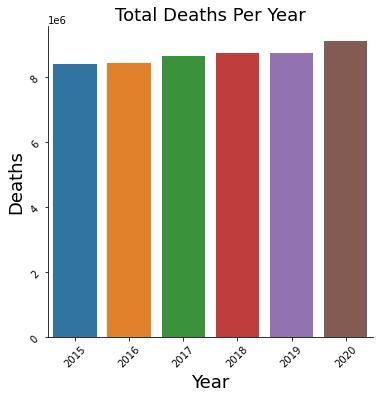

In [11]:
years = ['2015', '2016', '2017', '2018', '2019', '2020', 'Total']
deaths = [sum_2015, sum_2016, sum_2017, sum_2018, sum_2019, sum_2020, totalDeaths_all]
rate = [round(sum_2015/totalDeaths_all, 5), round(sum_2016/totalDeaths_all, 5),
        round(sum_2017/totalDeaths_all, 5), round(sum_2018/totalDeaths_all, 5),
        round(sum_2019/totalDeaths_all, 5), round(sum_2020/totalDeaths_all, 5)]

rateSum = sum(rate)
rate.append(rateSum)

df_deaths = np.array([years, deaths, rate]).T
df_deaths = df_deaths.reshape(7,3)
df_deaths = pd.DataFrame(df_deaths)
df_deaths.columns = ['Year', 'Deaths', 'Rate']

df_ndeaths = df_deaths

df_ndeaths.drop(df_ndeaths.tail(1).index,inplace=True) # drop first n rows

# convert column "a" of a DataFrame
df_ndeaths['Year'] = pd.to_numeric(df_ndeaths['Year'])
df_ndeaths['Deaths'] = pd.to_numeric(df_ndeaths['Deaths'])

display(df_ndeaths)

sns.catplot(x = 'Year', y = 'Deaths', kind = 'bar', data = df_ndeaths)
plt.title("Total Deaths Per Year", size=18)
plt.xlabel("Year", size=18)
plt.ylabel("Deaths", size=18)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()


### Deaths by cause and year
Lets analyze deaths by cause and year. We will seperate each year by cause, create a dataframe and plot the results.

,Year,Alzheimer,Malignant,Respiratory,Circulatory,Other,Total
0,2015,978278,2381810,1062942,3314302,650998,8388330
1,2016,994914,2390754,1046110,3333214,653556,8418548
2,2017,1047324,2403926,1100342,3419926,674468,8645986
3,2018,1067976,2404396,1117264,3460880,682624,8733140
4,2019,1086700,2406090,1068318,3482152,684002,8727262
5,2020,1219705,2415926,1066075,3660848,743255,9105809


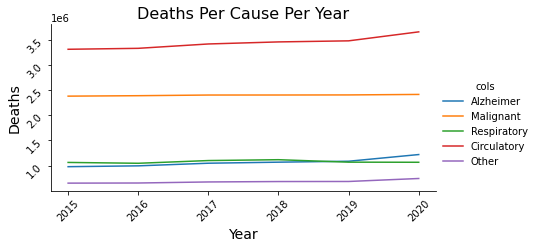

In [12]:
deathsAlzheimer_2015 = int(data.query("CauseGroup == 'Alzheimer disease and dementia' and Year == 2015")['NumberOfDeaths'].sum())
deathsMalignant_2015 = int(data.query("CauseGroup == 'Malignant neoplasms' and Year == 2015")['NumberOfDeaths'].sum())
deathsRespiratory_2015 = int(data.query("CauseGroup == 'Respiratory diseases' and Year == 2015")['NumberOfDeaths'].sum())
deathsCirculatory_2015 = int(data.query("CauseGroup == 'Circulatory diseases' and Year == 2015")['NumberOfDeaths'].sum())
deathsOther_2015 = int(data.query("CauseGroup == 'Other select causes' and Year == 2015")['NumberOfDeaths'].sum())

deathsAlzheimer_2016 = int(data.query("CauseGroup == 'Alzheimer disease and dementia' and Year == 2016")['NumberOfDeaths'].sum())
deathsMalignant_2016 = int(data.query("CauseGroup == 'Malignant neoplasms' and Year == 2016")['NumberOfDeaths'].sum())
deathsRespiratory_2016 = int(data.query("CauseGroup == 'Respiratory diseases' and Year == 2016")['NumberOfDeaths'].sum())
deathsCirculatory_2016 = int(data.query("CauseGroup == 'Circulatory diseases' and Year == 2016")['NumberOfDeaths'].sum())
deathsOther_2016 = int(data.query("CauseGroup == 'Other select causes' and Year == 2016")['NumberOfDeaths'].sum())

deathsAlzheimer_2017 = int(data.query("CauseGroup == 'Alzheimer disease and dementia' and Year == 2017")['NumberOfDeaths'].sum())
deathsMalignant_2017 = int(data.query("CauseGroup == 'Malignant neoplasms' and Year == 2017")['NumberOfDeaths'].sum())
deathsRespiratory_2017 = int(data.query("CauseGroup == 'Respiratory diseases' and Year == 2017")['NumberOfDeaths'].sum())
deathsCirculatory_2017 = int(data.query("CauseGroup == 'Circulatory diseases' and Year == 2017")['NumberOfDeaths'].sum())
deathsOther_2017 = int(data.query("CauseGroup == 'Other select causes' and Year == 2017")['NumberOfDeaths'].sum())

deathsAlzheimer_2018 = int(data.query("CauseGroup == 'Alzheimer disease and dementia' and Year == 2018")['NumberOfDeaths'].sum())
deathsMalignant_2018 = int(data.query("CauseGroup == 'Malignant neoplasms' and Year == 2018")['NumberOfDeaths'].sum())
deathsRespiratory_2018 = int(data.query("CauseGroup == 'Respiratory diseases' and Year == 2018")['NumberOfDeaths'].sum())
deathsCirculatory_2018 = int(data.query("CauseGroup == 'Circulatory diseases' and Year == 2018")['NumberOfDeaths'].sum())
deathsOther_2018 = int(data.query("CauseGroup == 'Other select causes' and Year == 2018")['NumberOfDeaths'].sum())

deathsAlzheimer_2019 = int(data.query("CauseGroup == 'Alzheimer disease and dementia' and Year == 2019")['NumberOfDeaths'].sum())
deathsMalignant_2019 = int(data.query("CauseGroup == 'Malignant neoplasms' and Year == 2019")['NumberOfDeaths'].sum())
deathsRespiratory_2019 = int(data.query("CauseGroup == 'Respiratory diseases' and Year == 2019")['NumberOfDeaths'].sum())
deathsCirculatory_2019 = int(data.query("CauseGroup == 'Circulatory diseases' and Year == 2019")['NumberOfDeaths'].sum())
deathsOther_2019 = int(data.query("CauseGroup == 'Other select causes' and Year == 2019")['NumberOfDeaths'].sum())

deathsAlzheimer_2020 = int(data.query("CauseGroup == 'Alzheimer disease and dementia' and Year == 2020")['NumberOfDeaths'].sum())
deathsMalignant_2020 = int(data.query("CauseGroup == 'Malignant neoplasms' and Year == 2020")['NumberOfDeaths'].sum())
deathsRespiratory_2020 = int(data.query("CauseGroup == 'Respiratory diseases' and Year == 2020")['NumberOfDeaths'].sum())
deathsCirculatory_2020 = int(data.query("CauseGroup == 'Circulatory diseases' and Year == 2020")['NumberOfDeaths'].sum())
deathsOther_2020 = int(data.query("CauseGroup == 'Other select causes' and Year == 2020")['NumberOfDeaths'].sum())

array_2015 = [2015, deathsAlzheimer_2015, deathsMalignant_2015, deathsRespiratory_2015, deathsCirculatory_2015, deathsOther_2015, sum_2015]
array_2016 = [2016, deathsAlzheimer_2016, deathsMalignant_2016, deathsRespiratory_2016, deathsCirculatory_2016, deathsOther_2016, sum_2016]
array_2017 = [2017, deathsAlzheimer_2017, deathsMalignant_2017, deathsRespiratory_2017, deathsCirculatory_2017, deathsOther_2017, sum_2017]
array_2018 = [2018, deathsAlzheimer_2018, deathsMalignant_2018, deathsRespiratory_2018, deathsCirculatory_2018, deathsOther_2018, sum_2018]
array_2019 = [2019, deathsAlzheimer_2019, deathsMalignant_2019, deathsRespiratory_2019, deathsCirculatory_2019, deathsOther_2019, sum_2019]
array_2020 = [2020, deathsAlzheimer_2020, deathsMalignant_2020, deathsRespiratory_2020, deathsCirculatory_2020, deathsOther_2020, sum_2020]

df_deathsCausePerYear = pd.DataFrame([array_2015, array_2016, array_2017, array_2018, array_2019, array_2020])

df_deathsCausePerYear.columns = ['Year', 'Alzheimer', 'Malignant', 'Respiratory', 'Circulatory', 'Other', 'Total']

display(df_deathsCausePerYear)

df_catPerYear = df_deathsCausePerYear.iloc[:,:-1]

df_catPerYear = df_catPerYear.melt('Year', var_name='cols', value_name='vals')

sns.relplot(x = 'Year', y = 'vals', hue = 'cols', kind = 'line', height=3, aspect=2, data = df_catPerYear)
plt.title("Deaths Per Cause Per Year", size=16)
plt.xlabel("Year", size=14)
plt.ylabel("Deaths", size=14)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()


From the results of Deaths Per Cause Per Year, we can see that the number of deaths increase every year in every categorical cause except respiratory. Respiratory deaths are the only categorical cause that the number of deaths decrease. We can visualize that circulatory deaths are the number one cause of deaths every year followed by malignant and then alzheimer and respiratory are about the same.

### Total deaths by cause
Now, lets analyze deaths by cause, create a dataframe and plot the results in a pie plot.

,Cause,Deaths,Rate
0,Circulatory,20671322,0.3974
1,Malignant,14402902,0.2769
2,Respiratory,6461051,0.1242
3,Alzheimer,6394897,0.1229
4,Other,4088903,0.0786


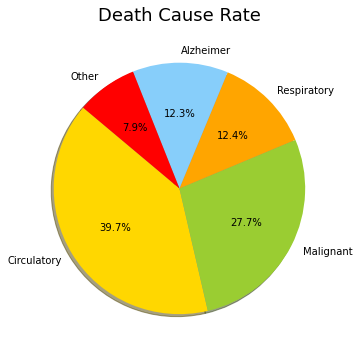

In [13]:
deaths_alzheimer = int(data.loc[data['CauseGroup'] == 'Alzheimer disease and dementia', 'NumberOfDeaths'].sum())
deaths_malignant = int(data.loc[data['CauseGroup'] == 'Malignant neoplasms', 'NumberOfDeaths'].sum())
deaths_respiratory = int(data.loc[data['CauseGroup'] == 'Respiratory diseases', 'NumberOfDeaths'].sum())
deaths_circulatory = int(data.loc[data['CauseGroup'] == 'Circulatory diseases', 'NumberOfDeaths'].sum())
deaths_other = int(data.loc[data['CauseGroup'] == 'Other select causes', 'NumberOfDeaths'].sum())

array_circulatory = ['Circulatory', deaths_circulatory, round(deaths_circulatory/totalDeaths_all, 4)]
array_malignant = ['Malignant', deaths_malignant, round(deaths_malignant/totalDeaths_all, 4)]
array_respiratory = ['Respiratory', deaths_respiratory, round(deaths_respiratory/totalDeaths_all, 4)]
array_alzheimer = ['Alzheimer', deaths_alzheimer, round(deaths_alzheimer/totalDeaths_all, 4)]
array_other = ['Other', deaths_other, round(deaths_other/totalDeaths_all, 4)]

df_cause = pd.DataFrame([array_circulatory, array_malignant, array_respiratory, array_alzheimer, array_other])

df_cause.columns = ['Cause', 'Deaths', 'Rate']

display(df_cause)

fig, ax = plt.subplots(figsize = (5, 6), subplot_kw = dict(aspect = "equal"))

labels = ['Circulatory', 'Malignant', 'Respiratory', 'Alzheimer', 'Other']
sizes = [39.74, 27.69, 12.42, 12.29, 7.86]
colors = ['gold', 'yellowgreen', 'orange', 'lightskyblue', 'red']

# Plot
plt.pie(sizes, labels = labels, colors = colors,
autopct='%1.1f%%', shadow = True, startangle=140)

plt.axis('equal')
plt.title('Death Cause Rate', size=18)
plt.show()

The pie plot above shows the total percentage of deaths per cause for years 2015-2020. The visualization of the pie plot also shows circulatory deaths as the number one cause of deaths at 39.7% and malignant deaths at 27.7% which with both of these together adds up to almost 70%. 

### Death rate by cause and year

In [14]:
rateCause_2015 = ['2015', round(deathsAlzheimer_2015/sum_2015, 4), round(deathsMalignant_2015/sum_2015, 4),
                  round(deathsRespiratory_2015/sum_2015, 4), round(deathsCirculatory_2015/sum_2015, 4),
                  round(deathsOther_2015/sum_2015, 4)]
rateCause_2016 = ['2016', round(deathsAlzheimer_2016/sum_2016, 4), round(deathsMalignant_2016/sum_2016, 4),
                  round(deathsRespiratory_2016/sum_2016, 4), round(deathsCirculatory_2016/sum_2016, 4),
                  round(deathsOther_2016/sum_2016, 4)]
rateCause_2017 = ['2017', round(deathsAlzheimer_2017/sum_2017, 4), round(deathsMalignant_2017/sum_2017, 4),
                  round(deathsRespiratory_2017/sum_2017, 4), round(deathsCirculatory_2017/sum_2017, 4),
                  round(deathsOther_2017/sum_2017, 4)]
rateCause_2018 = ['2018', round(deathsAlzheimer_2018/sum_2018, 4), round(deathsMalignant_2018/sum_2018, 4),
                  round(deathsRespiratory_2018/sum_2018, 4), round(deathsCirculatory_2018/sum_2018, 4),
                  round(deathsOther_2018/sum_2018, 4)]
rateCause_2019 = ['2019', round(deathsAlzheimer_2019/sum_2019, 4), round(deathsMalignant_2019/sum_2019, 4),
                  round(deathsRespiratory_2019/sum_2019, 4), round(deathsCirculatory_2019/sum_2019, 4),
                  round(deathsOther_2019/sum_2019, 4)]
rateCause_2020 = ['2020', round(deathsAlzheimer_2020/sum_2020, 4), round(deathsMalignant_2020/sum_2020, 4),
                  round(deathsRespiratory_2020/sum_2020, 4), round(deathsCirculatory_2020/sum_2020, 4),
                  round(deathsOther_2020/sum_2020, 4)]

df_rateCause = pd.DataFrame([rateCause_2015, rateCause_2016, rateCause_2017, rateCause_2018, rateCause_2019, rateCause_2020])
df_rateCause.columns = ['Year', 'Alzheimer', 'Malignant', 'Respiratory', 'Circulatory', 'Other']

display(df_rateCause)


,Year,Alzheimer,Malignant,Respiratory,Circulatory,Other
0,2015,0.1166,0.2839,0.1267,0.3951,0.0776
1,2016,0.1182,0.2840,0.1243,0.3959,0.0776
2,2017,0.1211,0.2780,0.1273,0.3956,0.0780
3,2018,0.1223,0.2753,0.1279,0.3963,0.0782
4,2019,0.1245,0.2757,0.1224,0.3990,0.0784
5,2020,0.1339,0.2653,0.1171,0.4020,0.0816


### Death trends per cause
Lets analyze the death trends per cause and plot them seperately.

,Circulatory
Year,
2015,3314302
2016,3333214
2017,3419926
2018,3460880
2019,3482152
2020,3660848


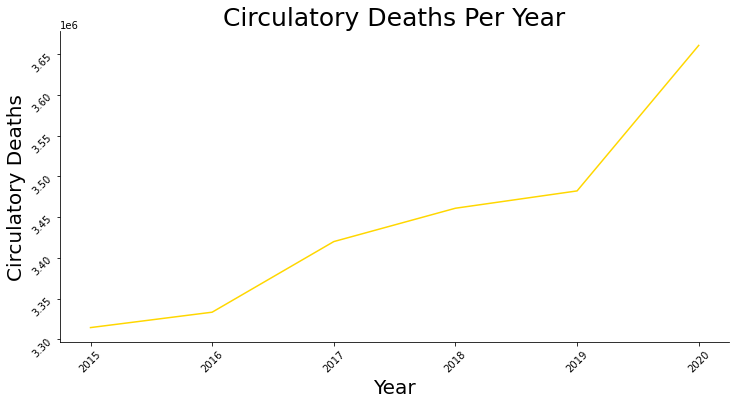

,Malignant
Year,
2015,2381810
2016,2390754
2017,2403926
2018,2404396
2019,2406090
2020,2415926


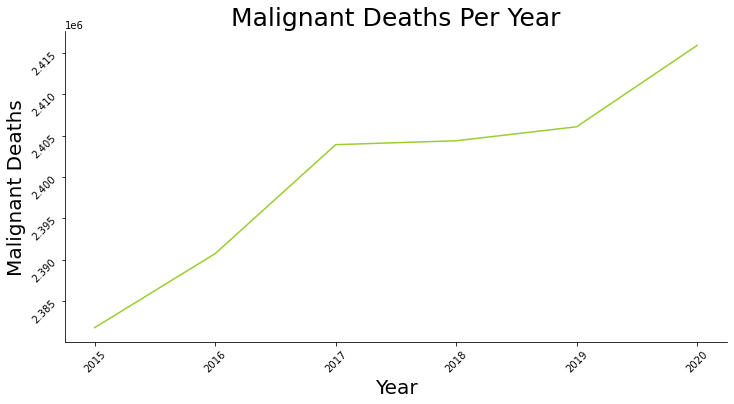

,Respiratory
Year,
2015,1062942
2016,1046110
2017,1100342
2018,1117264
2019,1068318
2020,1066075


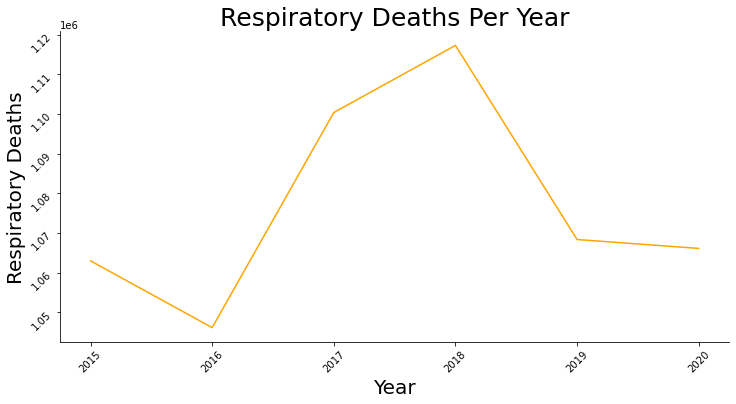

,Alzheimer
Year,
2015,978278
2016,994914
2017,1047324
2018,1067976
2019,1086700
2020,1219705


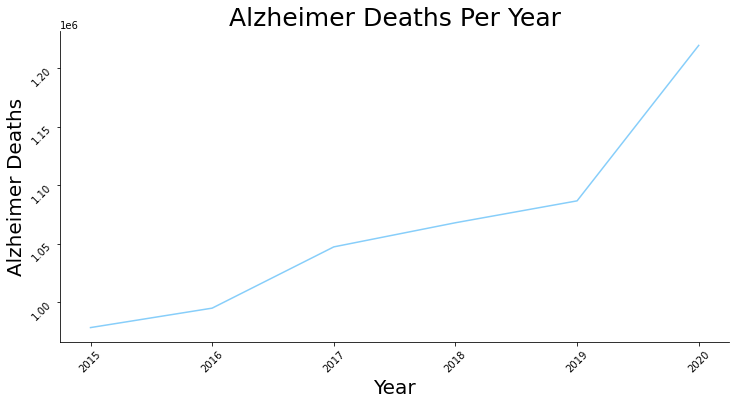

,Other
Year,
2015,650998
2016,653556
2017,674468
2018,682624
2019,684002
2020,743255


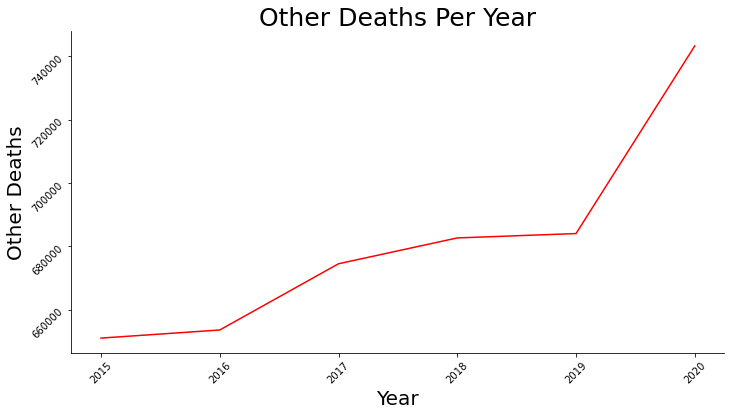

In [15]:
data_circulatory = pd.DataFrame([df_deathsCausePerYear['Year'], df_deathsCausePerYear['Circulatory']])
data_circulatory = data_circulatory.transpose().set_index('Year')
display(data_circulatory)
# Draw Plot
sns.relplot(x=data_circulatory.index, y='Circulatory', kind='line', height=5, aspect=2, color='gold', data=data_circulatory)
plt.title("Circulatory Deaths Per Year", size=25)
plt.xlabel("Year", size=20)
plt.ylabel("Circulatory Deaths", size=20)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

data_malignant = pd.DataFrame([df_deathsCausePerYear['Year'], df_deathsCausePerYear['Malignant']])
data_malignant = data_malignant.transpose().set_index('Year')
display(data_malignant)
# Draw Plot
sns.relplot(x=data_malignant.index, y='Malignant', kind = 'line', height=5, aspect=2, color='yellowgreen', data=data_malignant)
plt.title("Malignant Deaths Per Year", size=25)
plt.xlabel("Year", size=20)
plt.ylabel("Malignant Deaths", size=20)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

data_respiratory = pd.DataFrame([df_deathsCausePerYear['Year'], df_deathsCausePerYear['Respiratory']])
data_respiratory = data_respiratory.transpose().set_index('Year')
display(data_respiratory)
# Draw Plot
sns.relplot(x=data_respiratory.index, y='Respiratory', kind = 'line', height=5, aspect=2, color='orange', data=data_respiratory)
plt.title("Respiratory Deaths Per Year", size=25)
plt.xlabel("Year", size=20)
plt.ylabel("Respiratory Deaths", size=20)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

data_alzheimer = pd.DataFrame([df_deathsCausePerYear['Year'], df_deathsCausePerYear['Alzheimer']])
data_alzheimer = data_alzheimer.transpose().set_index('Year')
display(data_alzheimer)
# Draw Plot
sns.relplot(x=data_alzheimer.index, y='Alzheimer', kind = 'line', height=5, aspect=2, color='lightskyblue', data=data_alzheimer)
plt.title("Alzheimer Deaths Per Year", size=25)
plt.xlabel("Year", size=20)
plt.ylabel("Alzheimer Deaths", size=20)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

data_other = pd.DataFrame([df_deathsCausePerYear['Year'], df_deathsCausePerYear['Other']])
data_other = data_other.transpose().set_index('Year')
display(data_other)
# Draw Plot
sns.relplot(x=data_other.index, y='Other', kind = 'line', height=5, aspect=2, color='red', data=data_other)
plt.title("Other Deaths Per Year", size=25)
plt.xlabel("Year", size=20)
plt.ylabel("Other Deaths", size=20)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()


According to the visualizations above, you can see the death trends of every category increase every year except respiratory. This is interesting because in the year 2020, most of the country had lockdown restrictions for the COVID-19 pandemic.

### Deaths by Jurisdiction
Now, lets analyze the number of deaths per jurisdiction/state/territory. We first create a copy of data and there is a row in the dataset that state/territory is United States. We cannot have this row in our data because we need specific states or territories. What we will do is drop this row.

In [16]:
jurisdiction_deaths = data.copy()

# Create index to drop
index_to_drop = jurisdiction_deaths[(jurisdiction_deaths['State/territory'] == 'United States')].index

# Drop index where state/territory is United States
jurisdiction_deaths.drop(index_to_drop, inplace = True)
jurisdiction_deaths.head()


,State/territory,Year,CauseGroup,NumberOfDeaths
0,Alabama,2015,Alzheimer disease and dementia,120
1,Alabama,2015,Alzheimer disease and dementia,120
2,Alabama,2016,Alzheimer disease and dementia,76
3,Alabama,2016,Alzheimer disease and dementia,76
4,Alabama,2017,Alzheimer disease and dementia,96


### Total deaths by year and jurisdiction
Lets use Pandas groupby function to get the total deaths by year and jurisdiction.

In [17]:
yearJurisdiction_df = jurisdiction_deaths.groupby(['Year', 'State/territory']).sum()
yearJurisdiction_df


NumberOfDeaths
Year State/territory                
2015 Alabama                   77032
     Alaska                     2254
     Arizona                   79724
     Arkansas                  47900
     California               411494
...                              ...
2020 Virginia                 113637
     Washington                87051
     West Virginia             29333
     Wisconsin                 84521
     Wyoming                    3360

[318 rows x 1 columns]

### Total deaths by jurisdiction
Now, lets get the total deaths by jurisdiction for all 6 years without the year and sort them. We will drop year index.

In [18]:
jurisdiction_deaths = jurisdiction_deaths.groupby('State/territory', as_index=False).sum()
jurisdiction_deaths.drop('Year', axis = 1, inplace = True)
jurisdiction_deaths
display(jurisdiction_deaths.head())

jurisdiction_deaths_sorted = jurisdiction_deaths.sort_values('NumberOfDeaths', ascending=False).reset_index(drop=True)
display(jurisdiction_deaths_sorted.head())

,State/territory,NumberOfDeaths
0,Alabama,492182
1,Alaska,13654
2,Arizona,518901
3,Arkansas,296365
4,California,2548245


,State/territory,NumberOfDeaths
0,California,2548245
1,Florida,1908728
2,Texas,1861608
3,Pennsylvania,1259968
4,Ohio,1142658


Lets plot the results in a line plot. We will plot the top 10 and then the tail 10.

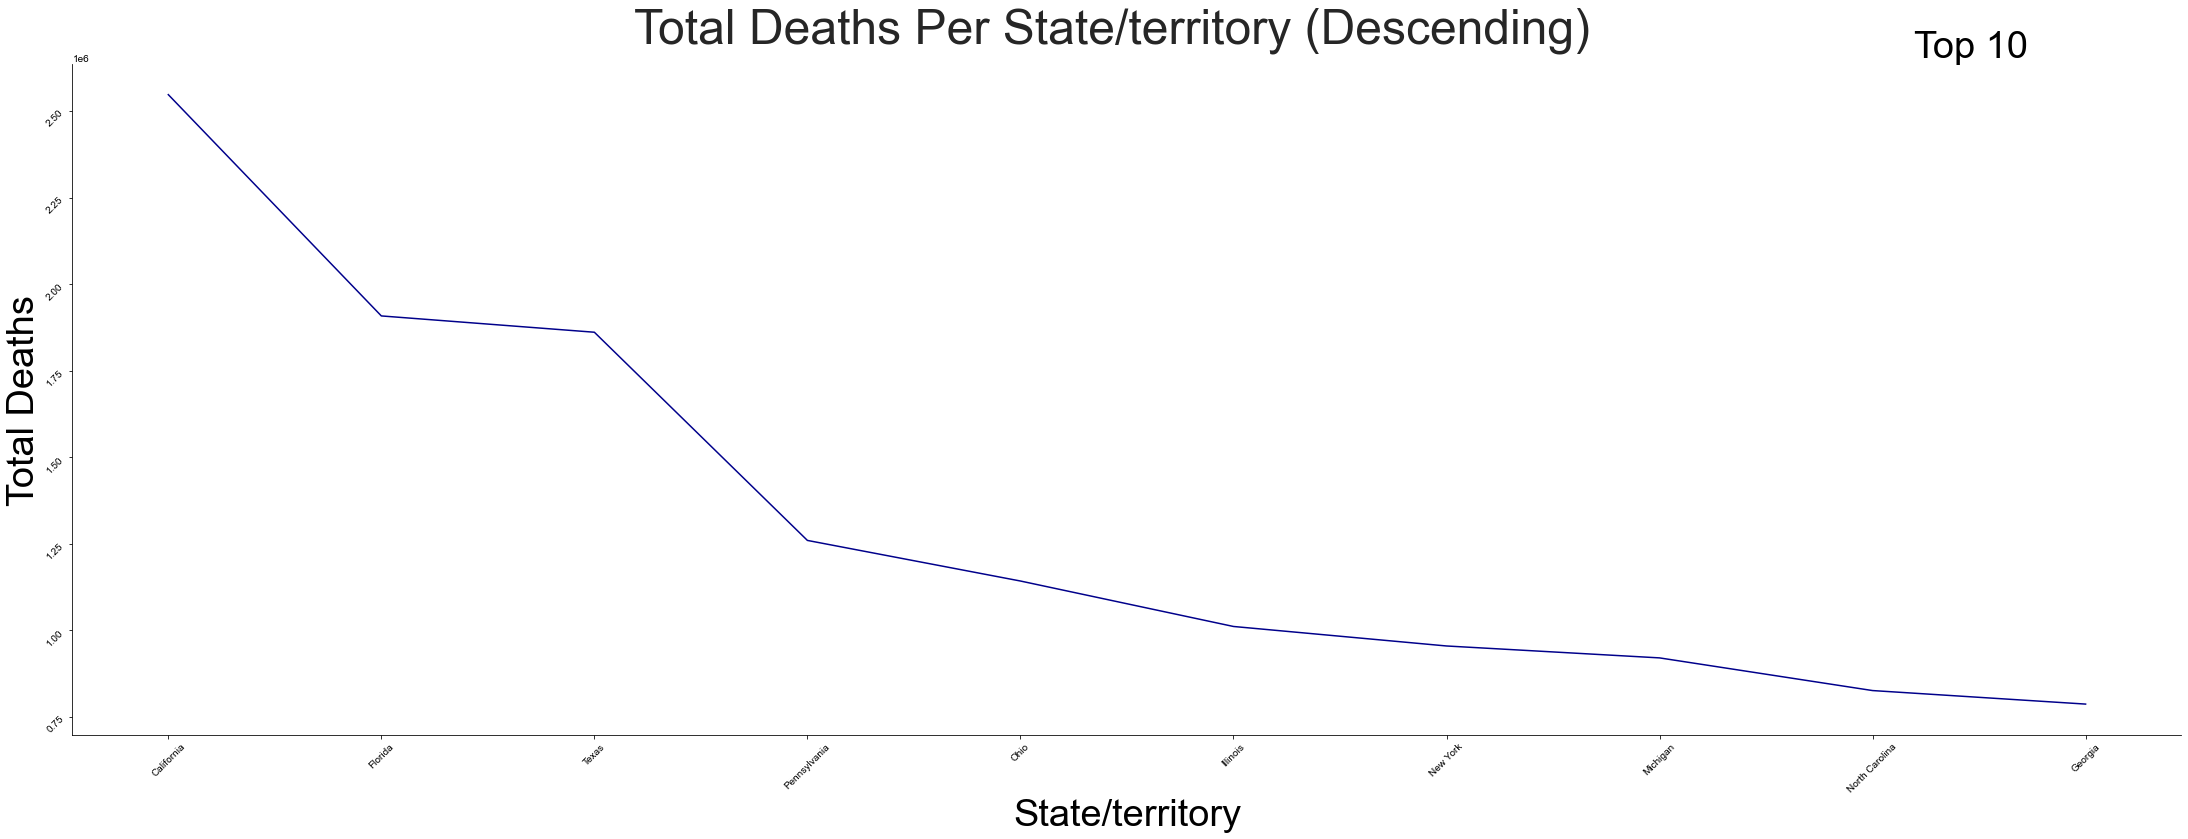

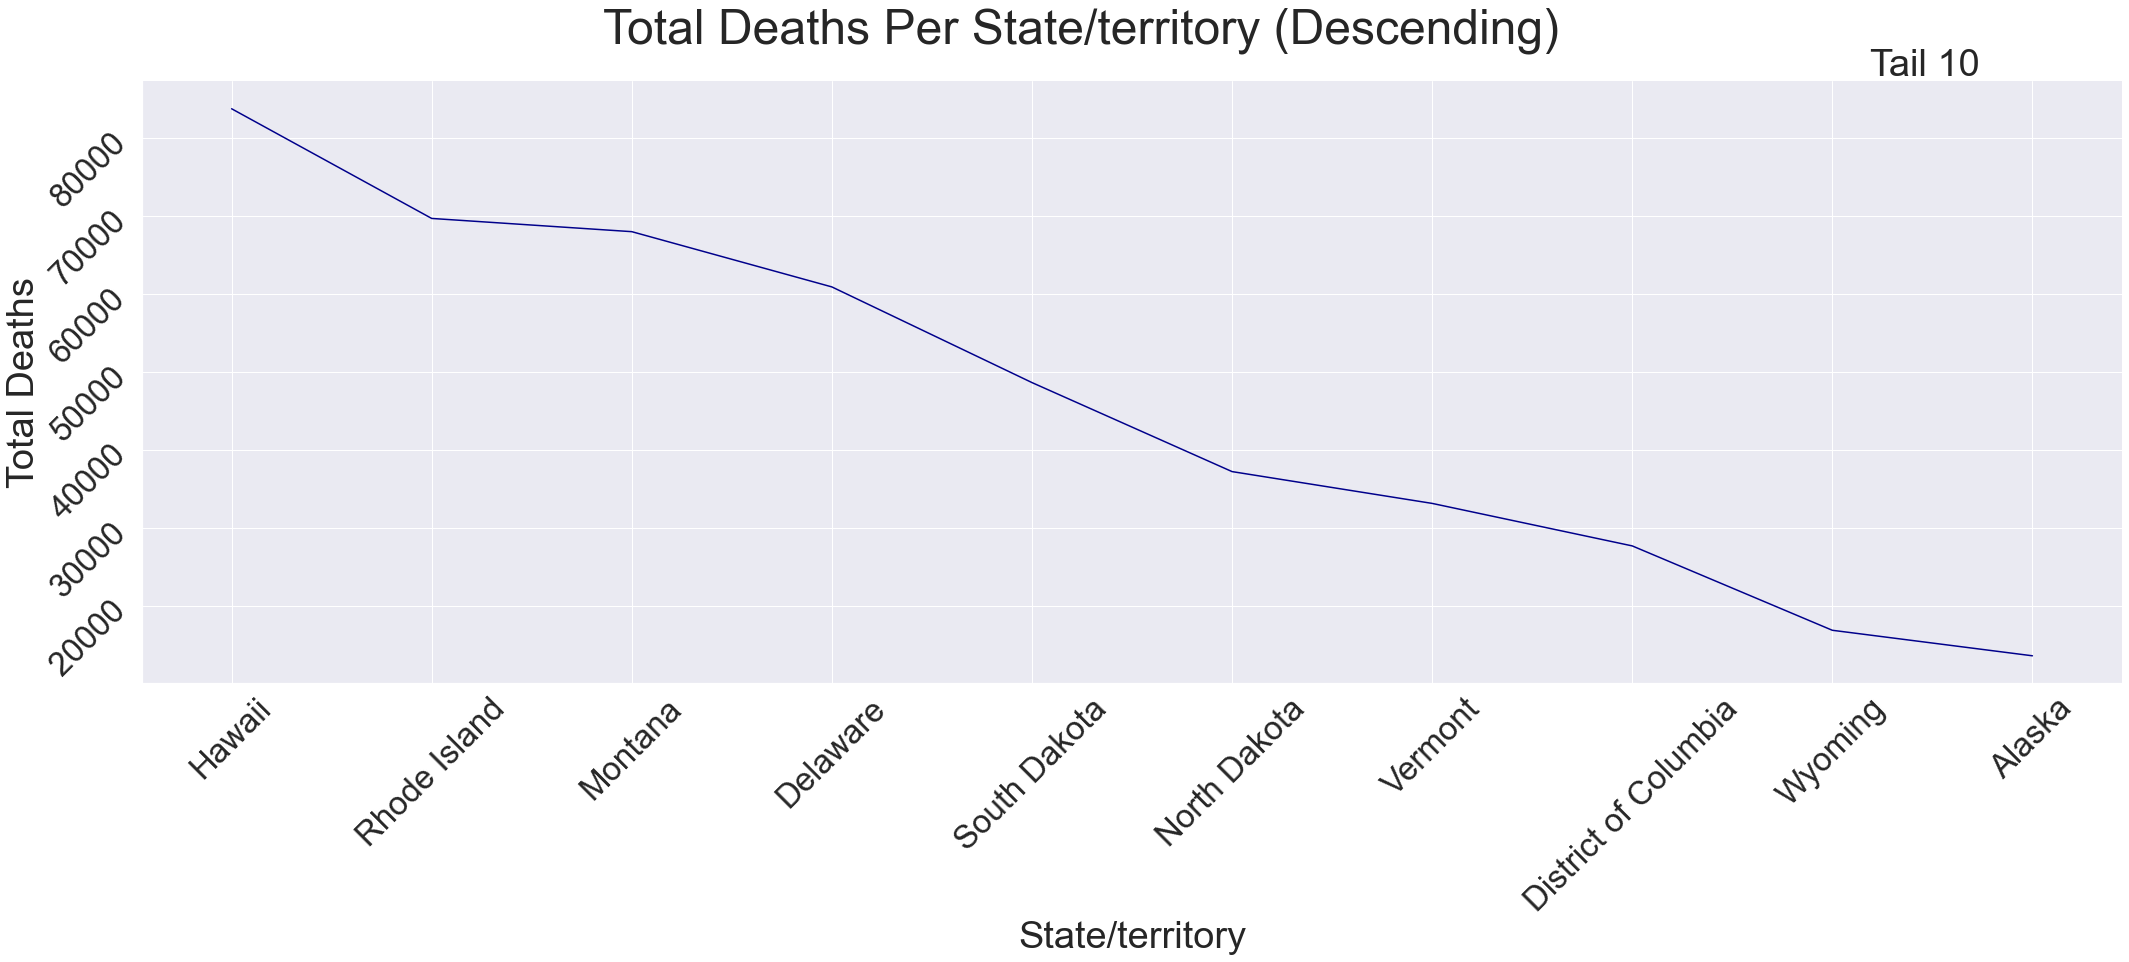

In [19]:
sns.relplot(x='State/territory', y='NumberOfDeaths', kind = 'line', height=10, aspect=3, color='darkblue', data=jurisdiction_deaths_sorted.head(10))
sns.set(font_scale = 3)
plt.suptitle("Total Deaths Per State/territory (Descending)", size=48, y=1.05)
plt.title("Top 10", size=38, x=0.9)
plt.xlabel("State/territory", size=38)
plt.ylabel("Total Deaths", size=38)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

sns.relplot(x='State/territory', y='NumberOfDeaths', kind = 'line', height=10, aspect=3, color='darkblue', data=jurisdiction_deaths_sorted.tail(10))
sns.set(font_scale = 3)
plt.suptitle("Total Deaths Per State/territory (Descending)", size=48, y=1.05)
plt.title("Tail 10", size=38, x=0.9)
plt.xlabel("State/territory", size=38)
plt.ylabel("Total Deaths", size=38)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

### 2020 deaths by jurisdiction sorted from most to least
Now, lets sort the deaths from most to least for the year 2020.

In [20]:
jurisdiction_deaths2020_sorted = yearJurisdiction_df.copy()
jurisdiction_deaths2020_sorted = jurisdiction_deaths2020_sorted.loc[(2020)].sort_values('NumberOfDeaths', ascending=False).reset_index()

# Display the head
display(jurisdiction_deaths2020_sorted.head())

# Display the tail.
display(jurisdiction_deaths2020_sorted.tail())

,State/territory,NumberOfDeaths
0,California,449439
1,Florida,342518
2,Texas,335766
3,Pennsylvania,214464
4,Ohio,198922


,State/territory,NumberOfDeaths
48,North Dakota,6432
49,Vermont,6083
50,District of Columbia,4480
51,Wyoming,3360
52,Alaska,2380


## Plot the Results

Lets plot the results for the year 2020 from most deaths to least deaths in 2 seperate plots. First, we will plot the top 10 and then we will plot the tail 10.

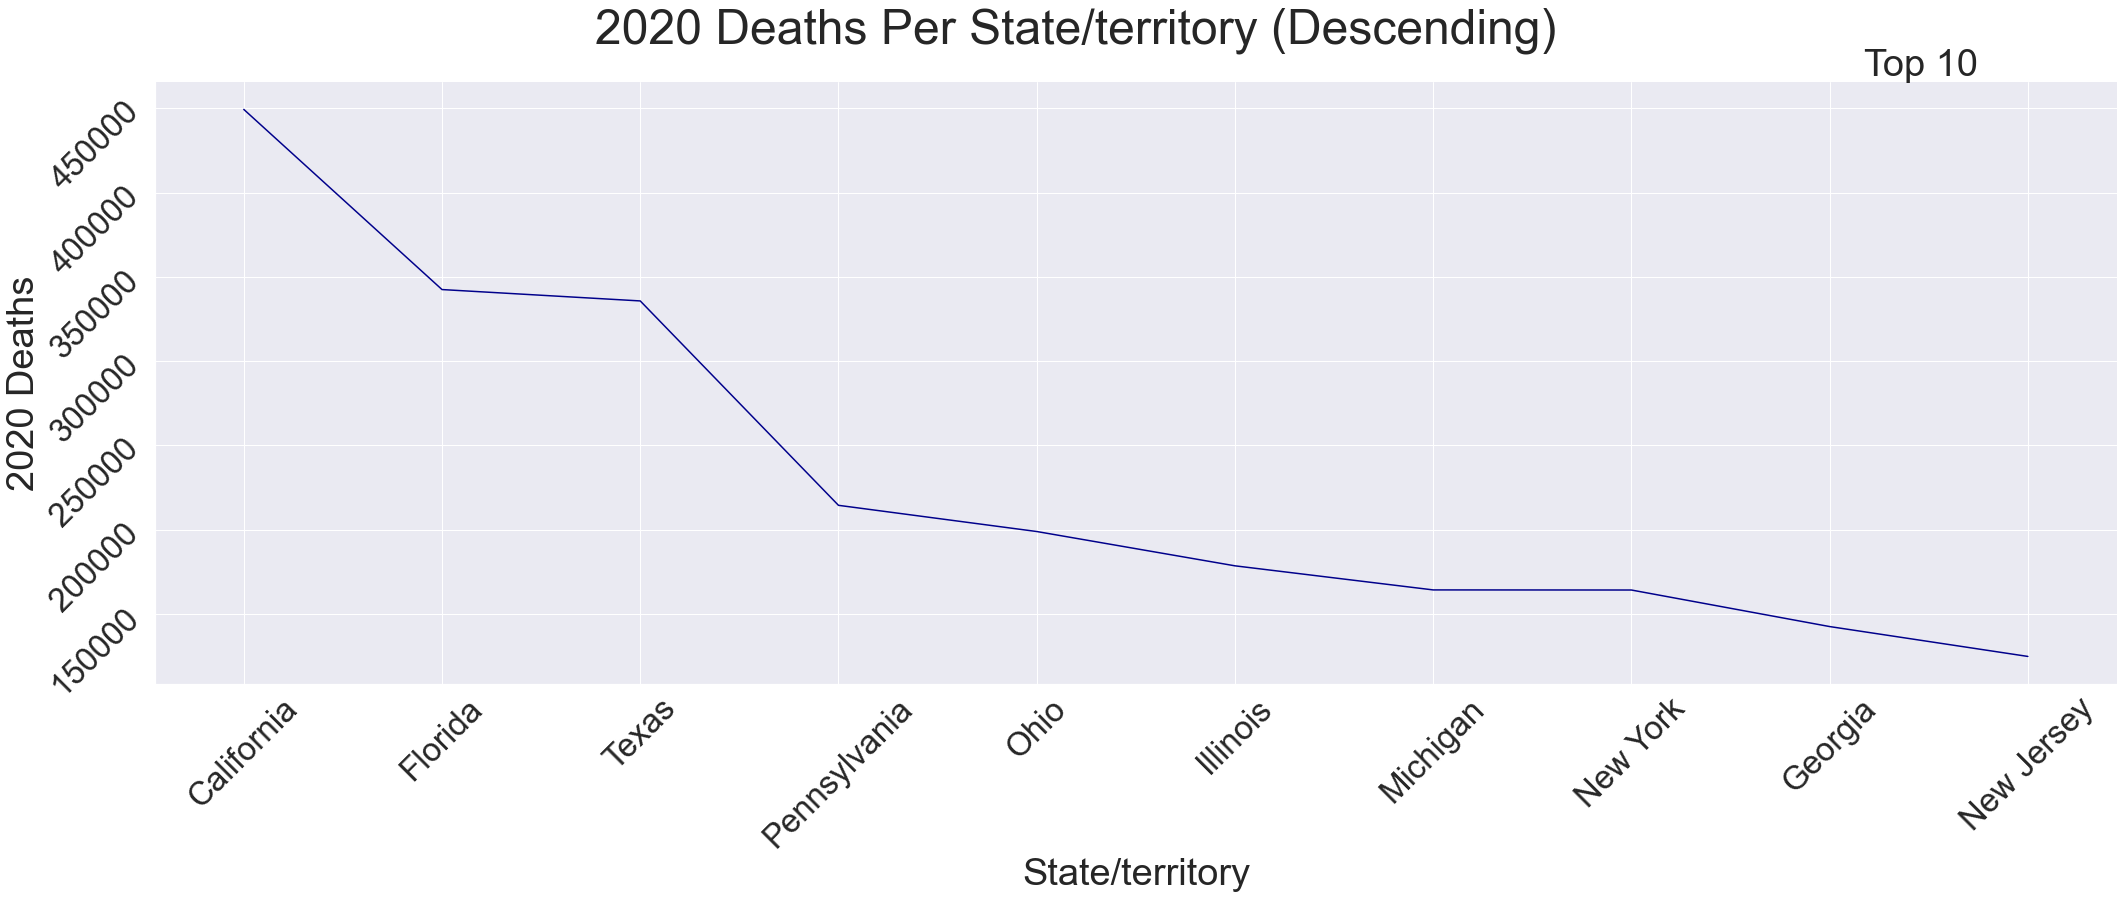

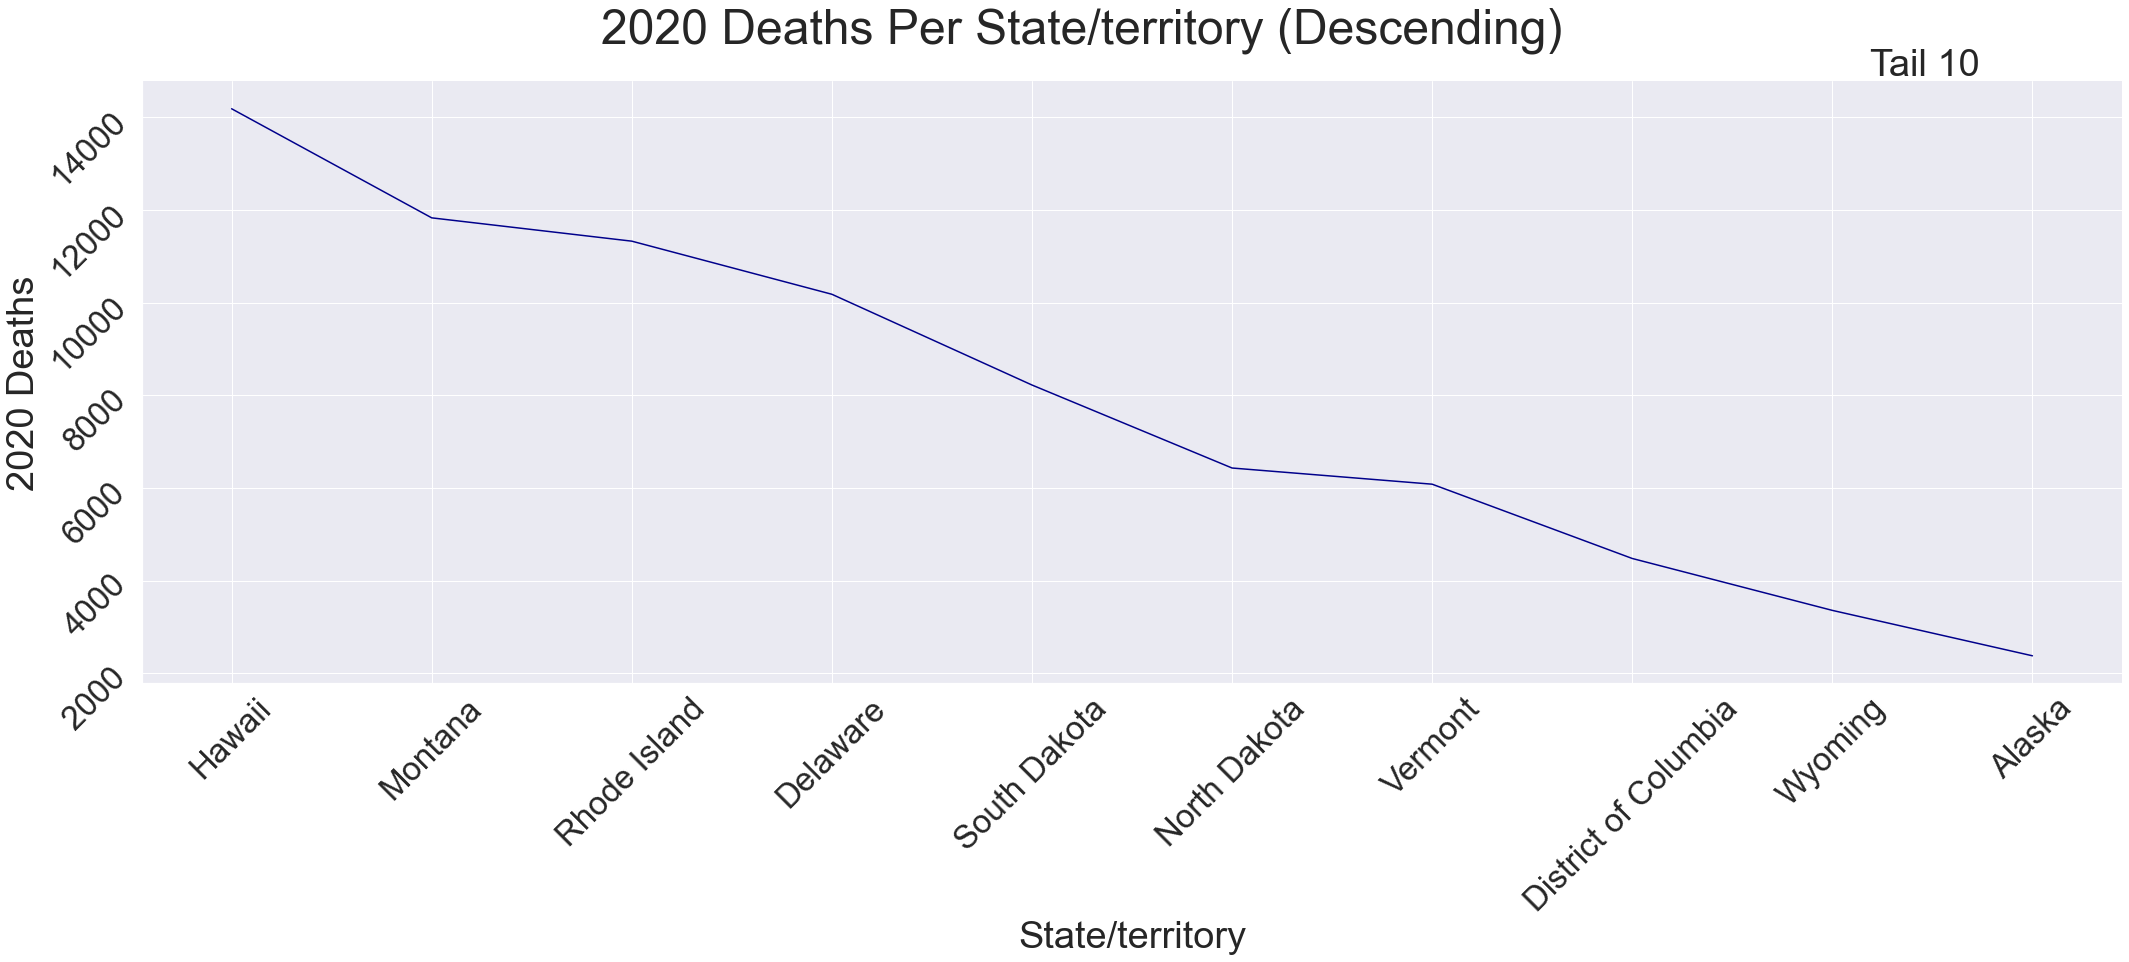

In [21]:
sns.relplot(x='State/territory', y='NumberOfDeaths', kind = 'line', height=10, aspect=3, color='darkblue', data=jurisdiction_deaths2020_sorted.head(10))
sns.set(font_scale = 3)
plt.suptitle("2020 Deaths Per State/territory (Descending)", size=48, y=1.05)
plt.title("Top 10", size=38, x=0.9)
plt.xlabel("State/territory", size=38)
plt.ylabel("2020 Deaths", size=38)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

sns.relplot(x='State/territory', y='NumberOfDeaths', kind = 'line', height=10, aspect=3, color='darkblue', data=jurisdiction_deaths2020_sorted.tail(10))
sns.set(font_scale = 3)
plt.suptitle("2020 Deaths Per State/territory (Descending)", size=48, y=1.05)
plt.title("Tail 10", size=38, x=0.9)
plt.xlabel("State/territory", size=38)
plt.ylabel("2020 Deaths", size=38)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

From the above plots, you can visualize that California had the most total deaths and the most deaths in the year 2020, followed by Florida. Is this because California and Florida are highly populated? We will analyze this in the next step.

# Adding Population Data

One thing that we should keep in mind is that different states have different populations, and thus different death rates. California will have more deaths than Idaho simply because it has more people. To correct for this, we can figure out the Deaths Per Capita, or the proportion of deaths for the entire population.

However, our data doesn't have any population estimates so we will need to get that data ourselves. Thankfully, we can use the US Census to find the populations, or at least population estimates, for each state for each year. The data can be found [here](https://www.census.gov/data/tables/time-series/demo/popest/2010s-state-total.html#par_textimage). Note that these are population estimates. The Census was conducted in 2010, and each year's population was estimated from that data.

We should also note that this dataset contains much more information than just population estimates, such as counts for deaths, migration and natural increase. We are only interesting in the population estimates, so we can remove the rest of the variables.

In [22]:
# Load in the US Census Population data for 2010-2019
df_pop = pd.read_csv("nst-est2019-alldata.csv")
df_pop_clean = df_pop.copy()

# This dataset contains other information as well, like Deaths, Migration and Residuals.
# We only care about the population, so we can drop the rest
df_pop_clean = df_pop_clean[["NAME", "POPESTIMATE2010", "POPESTIMATE2011", "POPESTIMATE2012", "POPESTIMATE2013", 
                             "POPESTIMATE2014", "POPESTIMATE2015", "POPESTIMATE2016", "POPESTIMATE2017",
                             "POPESTIMATE2018", "POPESTIMATE2019"]]
df_pop_clean.columns = ["Name", "pop2010", "pop2011", "pop2012", "pop2013", "pop2014", "pop2015",
                        "pop2016", "pop2017", "pop2018", "pop2019"]
df_pop_clean

,Name,pop2010,pop2011,pop2012,pop2013,pop2014,pop2015,pop2016,pop2017,pop2018,pop2019
0,United States,309321666,311556874,313830990,315993715,318301008,320635163,322941311,324985539,326687501,328239523
1,Northeast Region,55380134,55604223,55775216,55901806,56006011,56034684,56042330,56059240,56046620,55982803
2,Midwest Region,66974416,67157800,67336743,67560379,67745167,67860583,67987540,68126781,68236628,68329004
3,South Region,114866680,116006522,117241208,118364400,119624037,120997341,122351760,123542189,124569433,125580448
4,West Region,72100436,72788329,73477823,74167130,74925793,75742555,76559681,77257329,77834820,78347268
5,Alabama,4785437,4799069,4815588,4830081,4841799,4852347,4863525,4874486,4887681,4903185
6,Alaska,713910,722128,730443,737068,736283,737498,741456,739700,735139,731545
7,Arizona,6407172,6472643,6554978,6632764,6730413,6829676,6941072,7044008,7158024,7278717
8,Arkansas,2921964,2940667,2952164,2959400,2967392,2978048,2989918,3001345,3009733,3017804
9,California,37319502,37638369,37948800,38260787,38596972,38918045,39167117,39358497,39461588,39512223


As always, we should check for missing and strange values, and correct them if possible. So let's do that for the population data as well.

In [23]:
# Check for missing values
df_pop_clean.isnull().sum()

Name       0
pop2010    0
pop2011    0
pop2012    0
pop2013    0
pop2014    0
pop2015    0
pop2016    0
pop2017    0
pop2018    0
pop2019    0
dtype: int64

In [24]:
# Check for strange values
df_pop_clean.describe()

,pop2010,pop2011,pop2012,pop2013,pop2014,pop2015,pop2016,pop2017,pop2018,pop2019
count,5.700000e+01,5.700000e+01,5.700000e+01,5.700000e+01,5.700000e+01,5.700000e+01,5.700000e+01,5.700000e+01,5.700000e+01,5.700000e+01
mean,1.634538e+07,1.646227e+07,1.658118e+07,1.669428e+07,1.681470e+07,1.693647e+07,1.705668e+07,1.716284e+07,1.725010e+07,1.733179e+07
std,4.444586e+07,4.477654e+07,4.511484e+07,4.543594e+07,4.578079e+07,4.613239e+07,4.647905e+07,4.678579e+07,4.704177e+07,4.727622e+07
min,5.644870e+05,5.672990e+05,5.763050e+05,5.821220e+05,5.825310e+05,5.856130e+05,5.842150e+05,5.789310e+05,5.776010e+05,5.787590e+05
25%,1.854239e+06,1.856301e+06,1.856872e+06,1.865279e+06,1.879321e+06,1.891277e+06,1.905616e+06,1.915947e+06,1.925614e+06,1.934408e+06
50%,4.635649e+06,4.671994e+06,4.717354e+06,4.764080e+06,4.823617e+06,4.852347e+06,4.863525e+06,4.874486e+06,4.887681e+06,4.903185e+06
75%,9.574323e+06,9.657592e+06,9.749476e+06,9.843336e+06,9.929848e+06,9.931715e+06,9.950571e+06,9.973114e+06,9.984072e+06,9.986857e+06
max,3.093217e+08,3.115569e+08,3.138310e+08,3.159937e+08,3.183010e+08,3.206352e+08,3.229413e+08,3.249855e+08,3.266875e+08,3.282395e+08


From our analysis, and a quick visual inspection of the data, it appears that all the values are accounted for and correct. Now we just need to combine this data with our death rates data.

But our populations only go through 2019. We also want to include 2020 population data. At time of writing this, the 2020 census data has not been released yet so we will still need to work with estimates. The best estimates I found were from [here](https://en.wikipedia.org/wiki/2020_United_States_census). So we need to do some webscrapping to get these data.

In [25]:
# URL of 2020 census estimates
url = "https://en.wikipedia.org/wiki/2020_United_States_census"
# Use pandas to scrape the tables from the wikipedia page
tables = pd.read_html(url)

In [26]:
# Gather and clean up the estimated 2020 populations
df_pop_2020 = tables[2].copy()
# We don't need information on 2010 populations or percent change since then. 
# Drop all columns that aren't the state and the 2020 estimated pop.
df_pop_2020 = df_pop_2020[["State or territory", "July 1, 2020 estimated population[78]"]]
# Rename columns to be more usable
df_pop_2020.columns = ["State", "pop2020"]
# Add pop2020 as column to overall population dataframe
df_pop_full = df_pop_clean.copy()
df_pop_full = df_pop_full.merge(df_pop_2020, how="left", left_on="Name", right_on="State")
# Drop added State column
df_pop_full.drop("State", axis=1, inplace=True)
df_pop_full.head(6)

,Name,pop2010,pop2011,pop2012,pop2013,pop2014,pop2015,pop2016,pop2017,pop2018,pop2019,pop2020
0,United States,309321666,311556874,313830990,315993715,318301008,320635163,322941311,324985539,326687501,328239523,329484123.0
1,Northeast Region,55380134,55604223,55775216,55901806,56006011,56034684,56042330,56059240,56046620,55982803,NaN
2,Midwest Region,66974416,67157800,67336743,67560379,67745167,67860583,67987540,68126781,68236628,68329004,NaN
3,South Region,114866680,116006522,117241208,118364400,119624037,120997341,122351760,123542189,124569433,125580448,NaN
4,West Region,72100436,72788329,73477823,74167130,74925793,75742555,76559681,77257329,77834820,78347268,NaN
5,Alabama,4785437,4799069,4815588,4830081,4841799,4852347,4863525,4874486,4887681,4903185,4921532.0


Now we're going to merge our population and death dataframes. However, before we start, we should note that they are formatted differently. The population dataframe is per state, with each year as a new column. The deaths dataframe is per state and per year, with a single value for the deaths. 

Therefor, we're going to have to reformat our datasets. Let's transform our population data to match the form of the death counts dataframe.

In [27]:
df_deaths_per_state = yearJurisdiction_df.copy().reset_index()

# Change the dataframe to be per State, per year.
df_pop_per_state = pd.melt(df_pop_full, id_vars=["Name"])
# Now need to change the format of year from 'pop20XX' -> '20XX'
df_pop_per_state["variable"] = df_pop_per_state["variable"].apply(lambda x: re.sub(r"^pop", "", x))
# Rename the columns to be more understandable
df_pop_per_state.columns = ["Name", "Year", "Population"]
# Change the type of year to an int64 to match the deaths dataframe
df_pop_per_state["Year"] = df_pop_per_state["Year"].astype("int64")

# Merge the death and population dataframes
df_full = df_deaths_per_state.merge(df_pop_per_state, how="left", left_on=["Year", "State/territory"], right_on=["Year", "Name"])
df_full

,Year,State/territory,NumberOfDeaths,Name,Population
0,2015,Alabama,77032,Alabama,4852347.0
1,2015,Alaska,2254,Alaska,737498.0
2,2015,Arizona,79724,Arizona,6829676.0
3,2015,Arkansas,47900,Arkansas,2978048.0
4,2015,California,411494,California,38918045.0
...,...,...,...,...,...
313,2020,Virginia,113637,Virginia,8590563.0
314,2020,Washington,87051,Washington,7693612.0
315,2020,West Virginia,29333,West Virginia,1784787.0
316,2020,Wisconsin,84521,Wisconsin,5832655.0


Now we have Deaths and Population per state per year. It's an easily calculation to find the Deaths per Capita, i.e. proportion of deaths per year per state.

In [28]:
df_full["DeathsPerCapita"] = df_full["NumberOfDeaths"] / df_full["Population"]
df_full

,Year,State/territory,NumberOfDeaths,Name,Population,DeathsPerCapita
0,2015,Alabama,77032,Alabama,4852347.0,0.015875
1,2015,Alaska,2254,Alaska,737498.0,0.003056
2,2015,Arizona,79724,Arizona,6829676.0,0.011673
3,2015,Arkansas,47900,Arkansas,2978048.0,0.016084
4,2015,California,411494,California,38918045.0,0.010573
...,...,...,...,...,...,...
313,2020,Virginia,113637,Virginia,8590563.0,0.013228
314,2020,Washington,87051,Washington,7693612.0,0.011315
315,2020,West Virginia,29333,West Virginia,1784787.0,0.016435
316,2020,Wisconsin,84521,Wisconsin,5832655.0,0.014491


Lets create a dataframe for the year 2020 with 

/Users/jared/opt/anaconda3/lib/python3.8/site-packages/seaborn/relational.py:929: UserWarning: relplot is a figure-level function and does not accept the ax= paramter. You may wish to try lineplot
  warnings.warn(msg, UserWarning)


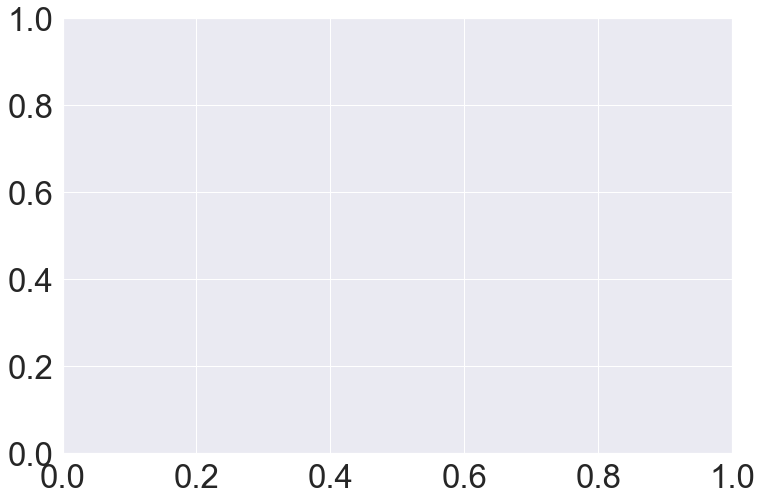

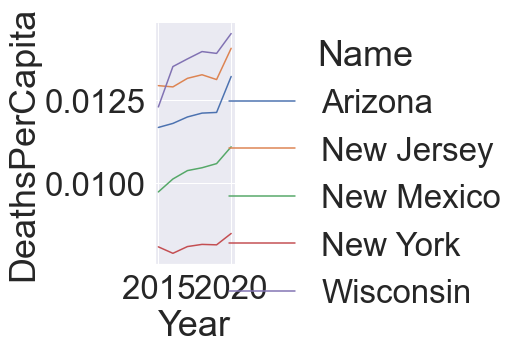

In [29]:
# Let's make a quick visualization of DeathsPerCapita.
# Pulling a few random states, let's look at the change over time
np.random.seed(1)
random_states = np.random.choice(df_full["Name"].unique(), 5, replace=False)

fig, ax = plt.subplots(1, 1, figsize=(12, 8))
sns.relplot(x="Year", y="DeathsPerCapita", hue="Name", kind="line", data=df_full.loc[df_full["Name"].isin(random_states)], ax=ax)

In [30]:
# Save the final dataset as a CSV file
df_full.to_csv("State_Deaths_and_Pops.csv")

## Webscraping for State Lockdowns

We want to compare how different lockdown levels affected the overall death rates of the jurisdictions. So we're going to need information on lockdown levels. Thankfully, [Wikipedia](https://en.wikipedia.org/wiki/U.S._state_and_local_government_responses_to_the_COVID-19_pandemic) has a very good resource for lockdown information for each state. We can use webscrapping to gather the information from the tables on this page to use for our goals.

In [31]:
# Cell to request and load the data
url = "https://en.wikipedia.org/wiki/U.S._state_and_local_government_responses_to_the_COVID-19_pandemic"

# Use pandas to webscrape wiki tables
tables = pd.read_html(url)

There are two tables on this page that are worth using. 

* The first contains information on each state's level of lockdown. What activites where restricted, whether masks are required when outdoors, things like that. We can use this to do some feature engineering on the severity of the lockdown for each state.
* The second table is the date range for states that gave "Stay at Home" orders. We can use these ranges to compare the death rates of states that did and didn't issue stay at home orders.

In [32]:
# Cell to extract and clean the table of restrictions

# Get the main table from the list
df_restrictions = tables[1]

# The original table has stacked column names, so we need to change that to a list
# Don't care about supertitle, so can just take subcolumn name.
new_columns = [col[1] for col in df_restrictions.columns]
df_restrictions.columns = new_columns

# Fix the column names that contain source numbers
# Also shorten names that can be shortened
df_restrictions.rename(columns={"Face coverings required in public[5]": "Masks required in public", \
                                "Bars & sit-down restaurants": "Restaurants"}, inplace=True)

# Remove columns: 
# "State/territory.1": extra state column because same as "State/territory" column
# "Stay at home ordered": because is contained in second table, in better format
# "Sources": Doesn't provide any useable information
df_restrictions.drop(["State/territory.1", "Stay at home ordered", "Sources"], axis=1, inplace=True)
df_restrictions

# Change datatypes of date columns to datetime
# Datetime only recognizes 0 padded numbers, so need to add 0 to strings
# Also, add the year 2020 to the string
def pad_emergency_dates(date):
    date = re.sub(r" ([0-9]{1}$)", r" 0\1", date)
    return date + ", 2020"

emergency_dates = df_restrictions["State of emergency declared"].apply(pad_emergency_dates)
df_restrictions["State of emergency declared"] = pd.to_datetime(emergency_dates, format="%B %d, %Y")

# Change datatypes of Yes/No columns to categorical
df_restrictions["Masks required in public"] = df_restrictions["Masks required in public"].astype("category")
df_restrictions["Gatherings banned"] = df_restrictions["Gatherings banned"].astype("category")
df_restrictions["Out-of-state travel restrictions"] = df_restrictions["Out-of-state travel restrictions"].astype("category")
df_restrictions["Schools"] = df_restrictions["Schools"].astype("category")
df_restrictions["Daycares"] = df_restrictions["Daycares"].astype("category")
df_restrictions["Restaurants"] = df_restrictions["Restaurants"].astype("category")
df_restrictions["Non-essential retail"] = df_restrictions["Non-essential retail"].astype("category")

In [33]:
# Cell to extract and clean the dates of lockdowns

# Get the table of lockdown ending dates
df_lockdown_dates = tables[2]

# Fix the Date for Wisconsin by removing source numbers
df_lockdown_dates["Date lifted"][22] = re.sub(r"\[[0-9]+\]+", "", df_lockdown_dates["Date lifted"][22])

# Change types of date columns in lockdown dataframe to datetime
df_lockdown_dates["Date enacted"] = pd.to_datetime(df_lockdown_dates["Date enacted"])
df_lockdown_dates["Date lifted"] = pd.to_datetime(df_lockdown_dates["Date lifted"])

In [34]:
# Cell to join the two tables

# Merge the two tables on by State
df = df_restrictions.merge(df_lockdown_dates, left_on="State/territory", right_on="State", how="left")
# Drop extra State column
df.drop(["State"], axis=1, inplace=True)
# Rename added columns
df.rename(columns={"Date enacated": "Lockdown enacted date", "Date lifted": "Lockdown lifted date"}, inplace=True)
df.head()

,State/territory,State of emergency declared,Masks required in public,Gatherings banned,Out-of-state travel restrictions,Schools,Daycares,Restaurants,Non-essential retail,Date enacted,Lockdown lifted date
0,Alabama,2020-03-13,Yes,10 or more,No,Yes (remainder of term),Yes,Yes,Yes,2020-04-04,2020-04-30
1,Alaska,2020-03-11,No,10 or more,Mandatory quarantine,Yes (remainder of term),Yes,Yes,Yes,NaT,NaT
2,American Samoa,2020-01-29,No,10 or more,Travel suspended,Yes (remainder of term),Yes,No,No,NaT,NaT
3,Arizona,2020-03-11,No,50 or more,Limited quarantine,Yes (remainder of term),Yes,Yes,Yes,NaT,NaT
4,Arkansas,2020-03-11,Yes,10 or more,No,Yes (remainder of term),Yes,Yes,Regional,NaT,NaT


In [35]:
# Save the dataframe as a pickle file
df.to_pickle("State_Lockdowns.pkl")

## Combine dataframes
We need to add total deaths and 2020 deaths to df in order to analyze them. Lets create another dataframe stateDeaths_2020 from yearJurisdiction_df and check the shape of the dataframes.

In [36]:
deaths_2020 = yearJurisdiction_df.loc[(2020)].reset_index()
deaths_total = jurisdiction_deaths

print(deaths_2020.shape)
print(deaths_total.shape)
print(df.shape)


(53, 2)
(53, 2)
(56, 11)


All three dataframes have to have the same number of rows in order to combine them so lets drop the rows from the dataframes where state/territory are not in the other dataframes check the shape of the dataframes again.

In [37]:
# Lists to store the state/territory that are not common to all three dataframes.
diff_elements1 = [i for i in list(df['State/territory']) if i not in list(deaths_2020['State/territory'])]
diff_elements2 = [i for i in list(deaths_2020['State/territory']) if i not in list(df['State/territory'])]

print(diff_elements1)
print(diff_elements2)

# Loop through diff_elements1 and delete that row from df.
for item in diff_elements1:
    df.drop(df[df['State/territory'] == item].index, inplace = True)

# Loop through diff_elements2 and delete that row from deaths_2020.
for item in diff_elements2:
    deaths_2020.drop(deaths_2020[deaths_2020['State/territory'] == item].index, inplace = True)
    deaths_total.drop(deaths_total[deaths_total['State/territory'] == item].index, inplace = True)
    

# Reset indexes
df = df.reset_index(drop=True)
deaths_2020 = deaths_2020.reset_index(drop=True)

print(deaths_2020.shape)
print(deaths_total.shape)
print(df.shape)

['American Samoa', 'Guam', 'N. Mariana Islands', 'U.S. Virgin Islands']
['New York City']
(52, 2)
(52, 2)
(52, 11)


Now that all 3 dataframes have the same number of rows, lets make sure that all 3 dataframes have the same state/territory in the same row for all 3 dataframes.

In [38]:
list(deaths_2020['State/territory']) == list(deaths_total['State/territory']) == list(df['State/territory'])

True

Now that all three dataframes have the same number of rows and the State/territory is correct, we can successfully combine the dataframes.

In [39]:
# Adding column '2020 Deaths' and column 'Total Deaths' to df
df['2020 Deaths'] = list(deaths_2020['NumberOfDeaths'])
df['Total Deaths'] = list(deaths_total['NumberOfDeaths'])

df.head()

,State/territory,State of emergency declared,Masks required in public,Gatherings banned,Out-of-state travel restrictions,Schools,Daycares,Restaurants,Non-essential retail,Date enacted,Lockdown lifted date,2020 Deaths,Total Deaths
0,Alabama,2020-03-13,Yes,10 or more,No,Yes (remainder of term),Yes,Yes,Yes,2020-04-04,2020-04-30,88198,492182
1,Alaska,2020-03-11,No,10 or more,Mandatory quarantine,Yes (remainder of term),Yes,Yes,Yes,NaT,NaT,2380,13654
2,Arizona,2020-03-11,No,50 or more,Limited quarantine,Yes (remainder of term),Yes,Yes,Yes,NaT,NaT,97983,518901
3,Arkansas,2020-03-11,Yes,10 or more,No,Yes (remainder of term),Yes,Yes,Regional,NaT,NaT,52855,296365
4,California,2020-03-04,Yes,All,No,Yes (remainder of term),Yes,Yes,Yes,NaT,NaT,449439,2548245


Lets sort df by total deaths for all 6 years.

In [40]:
df_mostTotalDeaths = df.sort_values('Total Deaths', ascending=False).reset_index(drop=True)

df_mostTotalDeaths.head(10)

,State/territory,State of emergency declared,Masks required in public,Gatherings banned,Out-of-state travel restrictions,Schools,Daycares,Restaurants,Non-essential retail,Date enacted,Lockdown lifted date,2020 Deaths,Total Deaths
0,California,2020-03-04,Yes,All,No,Yes (remainder of term),Yes,Yes,Yes,NaT,NaT,449439,2548245
1,Florida,2020-03-01,No,10 or more,Limited quarantine / Screened,Yes (remainder of term),Yes,Yes,Yes,2020-04-03,2020-05-04,342518,1908728
2,Texas,2020-03-13,Yes,10 or more,Limited quarantine,Yes (remainder of term),Yes,Yes,Yes,2020-04-02,2020-04-30,335766,1861608
3,Pennsylvania,2020-03-06,No,10 or more (recommended),Limited quarantine,Yes (remainder of term),Yes,Yes,Yes,NaT,NaT,214464,1259968
4,Ohio,2020-03-09,Yes,11 or more,Mandatory quarantine,Yes (remainder of term),Restricted,Yes,Yes,NaT,NaT,198922,1142658
5,Illinois,2020-03-09,Yes,All,No,Yes (remainder of term),Yes,Yes,Yes,2020-03-21,2020-05-30,178559,1011281
6,New York,2020-03-07,Yes,All,No,Yes (remainder of term),Yes,Yes,Yes,NaT,NaT,164201,954933
7,Michigan,2020-03-11,Yes,All,No,Yes (remainder of term),Yes,Yes,Yes,2020-03-24,2020-06-02,164261,920491
8,North Carolina,2020-03-10,Yes,10 or more,No,Yes (remainder of term),Yes,Yes,Yes,NaT,NaT,111580,826074
9,Georgia,2020-03-14,No,10 or more,No,Yes (remainder of term),No,Yes,Yes,2020-04-03,2020-04-30,142512,786982


We will do the same for deaths in 2020. 

In [41]:
df_mostDeaths2020 = df.sort_values('2020 Deaths', ascending=False).reset_index(drop=True)

df_mostDeaths2020.head(10)

,State/territory,State of emergency declared,Masks required in public,Gatherings banned,Out-of-state travel restrictions,Schools,Daycares,Restaurants,Non-essential retail,Date enacted,Lockdown lifted date,2020 Deaths,Total Deaths
0,California,2020-03-04,Yes,All,No,Yes (remainder of term),Yes,Yes,Yes,NaT,NaT,449439,2548245
1,Florida,2020-03-01,No,10 or more,Limited quarantine / Screened,Yes (remainder of term),Yes,Yes,Yes,2020-04-03,2020-05-04,342518,1908728
2,Texas,2020-03-13,Yes,10 or more,Limited quarantine,Yes (remainder of term),Yes,Yes,Yes,2020-04-02,2020-04-30,335766,1861608
3,Pennsylvania,2020-03-06,No,10 or more (recommended),Limited quarantine,Yes (remainder of term),Yes,Yes,Yes,NaT,NaT,214464,1259968
4,Ohio,2020-03-09,Yes,11 or more,Mandatory quarantine,Yes (remainder of term),Restricted,Yes,Yes,NaT,NaT,198922,1142658
5,Illinois,2020-03-09,Yes,All,No,Yes (remainder of term),Yes,Yes,Yes,2020-03-21,2020-05-30,178559,1011281
6,Michigan,2020-03-11,Yes,All,No,Yes (remainder of term),Yes,Yes,Yes,2020-03-24,2020-06-02,164261,920491
7,New York,2020-03-07,Yes,All,No,Yes (remainder of term),Yes,Yes,Yes,NaT,NaT,164201,954933
8,Georgia,2020-03-14,No,10 or more,No,Yes (remainder of term),No,Yes,Yes,2020-04-03,2020-04-30,142512,786982
9,New Jersey,2020-03-09,Yes,All,No,Yes (remainder of term),Yes,Yes,Yes,2020-03-21,2020-06-09,124781,704821


According to the results, we can see that the results for the top 10 total death states/territories for all six years and the death states/territories in the year 2020 are almost identical with a few differences.

# Lockdown Analysis 2020
Lets analyze the lockdown starting with the mask mandate in every state/territory. We will plot the results in a barplot.

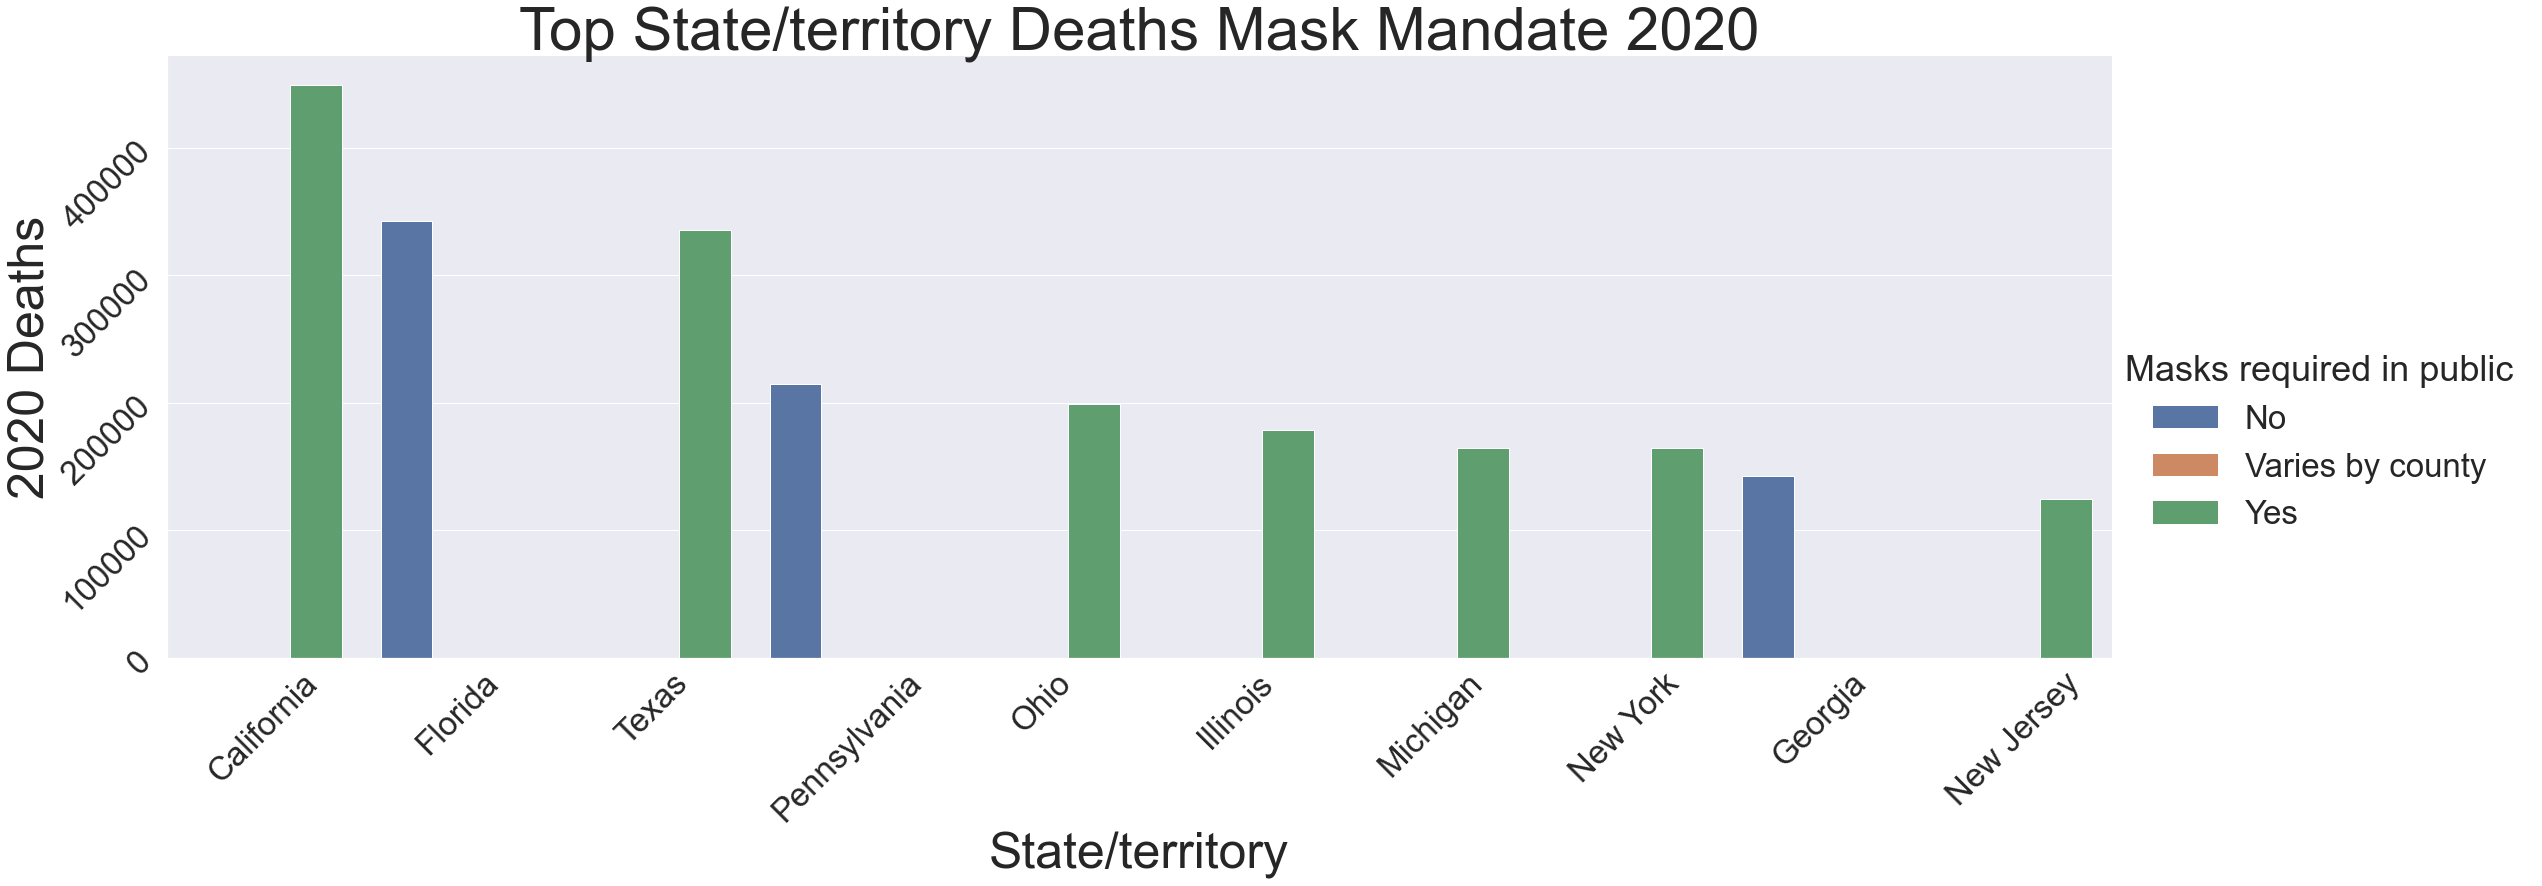

In [42]:
sns.catplot(x='State/territory', y='2020 Deaths', hue='Masks required in public', kind='bar', height=10, aspect=3, data=df_mostDeaths2020.head(10))
plt.title('Top State/territory Deaths Mask Mandate 2020', size=60)
plt.xlabel('State/territory', size=50)
plt.ylabel('2020 Deaths', size=50)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

The barplot visualization above displays data that shows how effective mask mandates were in the top 10 states/territories with the most deaths. Green bars indicate masks required in public and blue bars indicate no masks required in public. According to the plot, 6 of the top death states/territories required masks in public and 4 of the top death states/territories did not require masks in public. The number one death state (California) required masks in public and the number two death state (Florida) did not require masks in public. The above plot indicates that mask mandates did not make a difference.

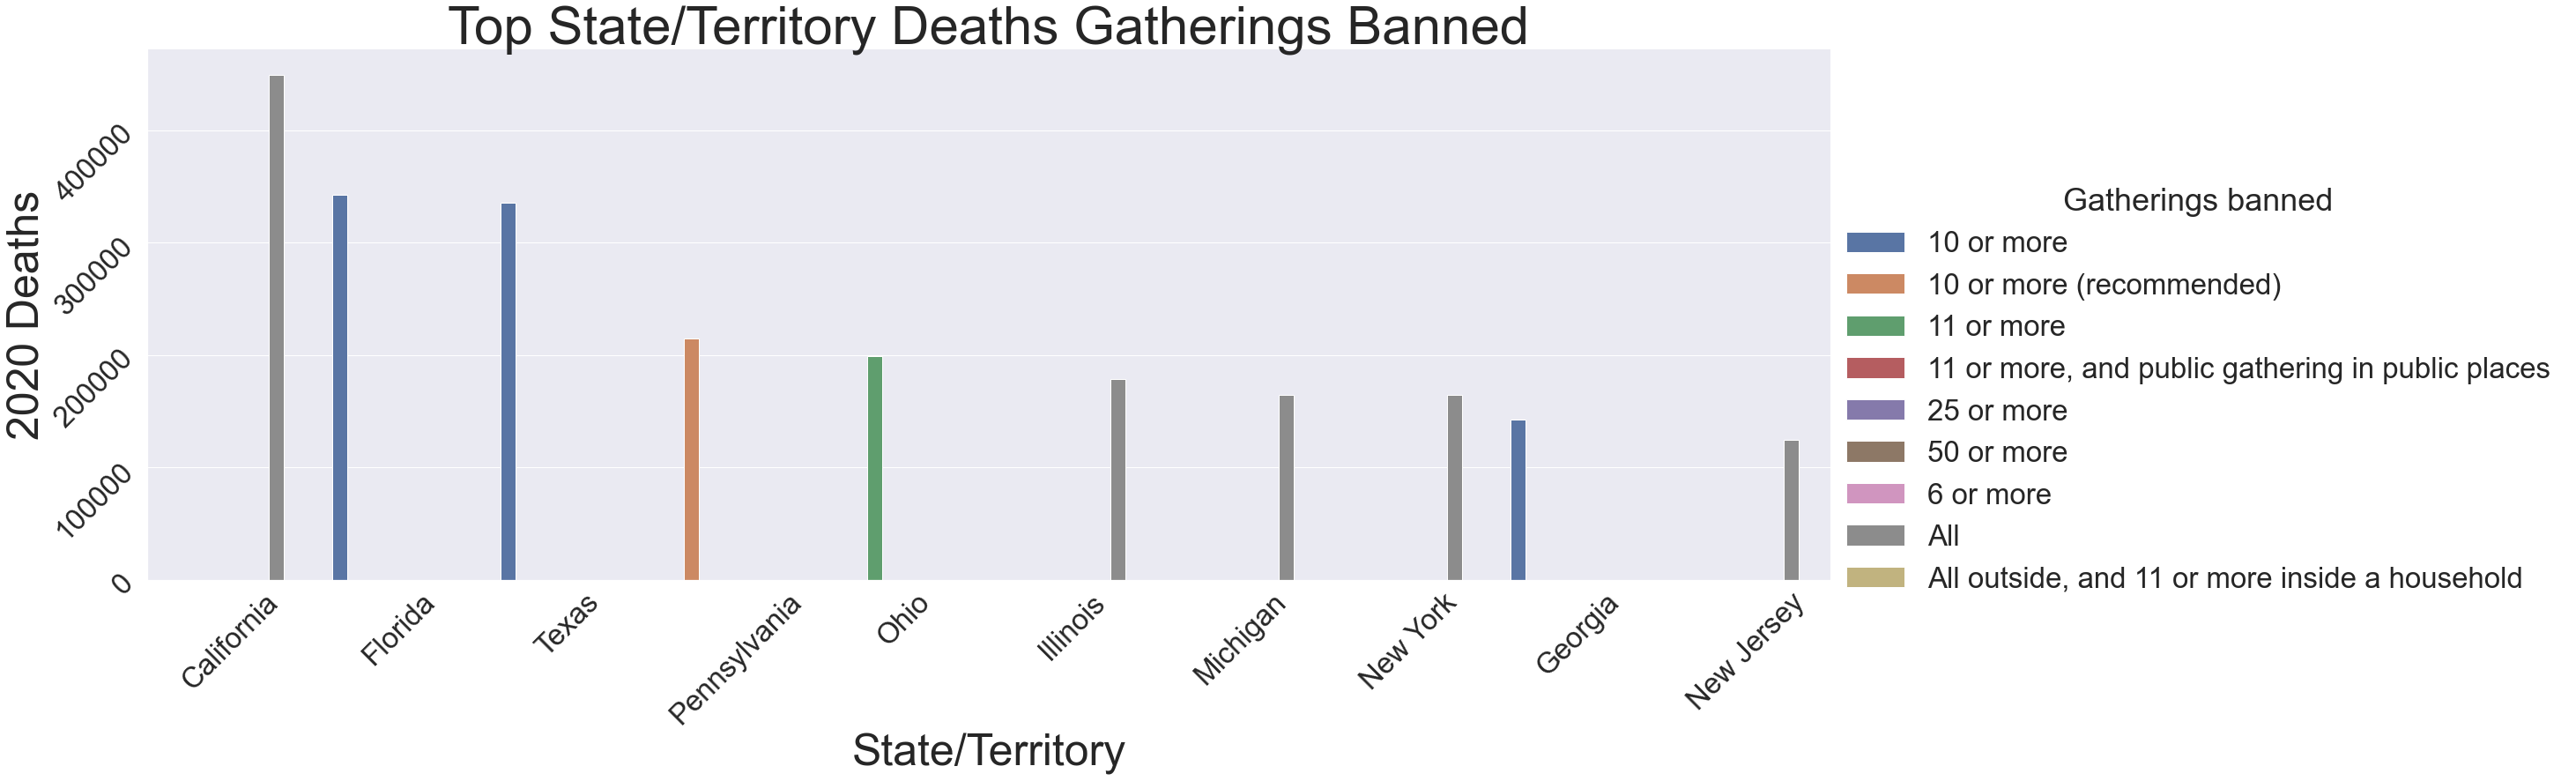

In [43]:
sns.catplot(x='State/territory', y='2020 Deaths', hue='Gatherings banned', kind='bar', height=10, aspect=3, data=df_mostDeaths2020.head(10))
plt.title('Top State/Territory Deaths Gatherings Banned', size=60)
plt.xlabel('State/Territory', size=50)
plt.ylabel('2020 Deaths', size=50)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

From the gatherings banned plot above, you can see that banning gatherings did not help. California had all gatherings banned and the number of deaths was still the highest.

The 2 plots above indicate that California, Florida, and Texas are the top 3 states that have the most deaths in total deaths for all 6 years and for deaths in the year 2020. Is this because they have the most population? We will analyze deaths per capita next.

Now, we can add Population and DeathsPerCapita to df.

In [44]:
# Create dataframe for the year 2020 from df_full.
df_full_2020 = df_full[df_full['Year'] == 2020].reset_index(drop=True)
df_full_2020.head()

,Year,State/territory,NumberOfDeaths,Name,Population,DeathsPerCapita
0,2020,Alabama,88198,Alabama,4921532.0,0.017921
1,2020,Alaska,2380,Alaska,731158.0,0.003255
2,2020,Arizona,97983,Arizona,7421401.0,0.013203
3,2020,Arkansas,52855,Arkansas,3030522.0,0.017441
4,2020,California,449439,California,39368078.0,0.011416


Lets check for null values.

In [45]:
df_full_2020.isnull().sum()

Year               0
State/territory    0
NumberOfDeaths     0
Name               1
Population         2
DeathsPerCapita    2
dtype: int64

Null values don't do us any good so we will drop the 2 rows where Population and DeathsPer Capita are null.

In [46]:
df_full_2020 = df_full_2020.dropna(subset = ['Population'])

df_full_2020.isnull().sum()

Year               0
State/territory    0
NumberOfDeaths     0
Name               0
Population         0
DeathsPerCapita    0
dtype: int64

Lets check the shape of df and df_full_2020

In [47]:
print(df.shape)
print(df_full_2020.shape)

df.head()

(52, 13)
(51, 6)


,State/territory,State of emergency declared,Masks required in public,Gatherings banned,Out-of-state travel restrictions,Schools,Daycares,Restaurants,Non-essential retail,Date enacted,Lockdown lifted date,2020 Deaths,Total Deaths
0,Alabama,2020-03-13,Yes,10 or more,No,Yes (remainder of term),Yes,Yes,Yes,2020-04-04,2020-04-30,88198,492182
1,Alaska,2020-03-11,No,10 or more,Mandatory quarantine,Yes (remainder of term),Yes,Yes,Yes,NaT,NaT,2380,13654
2,Arizona,2020-03-11,No,50 or more,Limited quarantine,Yes (remainder of term),Yes,Yes,Yes,NaT,NaT,97983,518901
3,Arkansas,2020-03-11,Yes,10 or more,No,Yes (remainder of term),Yes,Yes,Regional,NaT,NaT,52855,296365
4,California,2020-03-04,Yes,All,No,Yes (remainder of term),Yes,Yes,Yes,NaT,NaT,449439,2548245


We want to analyze 2020 DeathsPerCapita with lockdown restrictions so we need to make sure that df and df_full_2020 both have the same number of rows. We need to find out which row is in df that isn't in df_full_2020 and remove it.

In [48]:
# List to store the state/territory that is not common to in both dataframes.
diff_elements = [i for i in list(df['State/territory']) if i not in list(df_full_2020['State/territory'])]

print(diff_elements)

# Loop through diff_elements and delete that row from df.
for item in diff_elements:
    df.drop(df[df['State/territory'] == item].index, inplace = True)
    

# Reset index
df = df.reset_index(drop=True)

print(df.shape)
print(df_full_2020.shape)

['Puerto Rico']
(51, 13)
(51, 6)


Since df and df_full_2020 has the same number of rows, we can check if the state/territory in both dataframes matches.

In [49]:
list(df['State/territory']) == list(df_full_2020['State/territory'])

True

Both dataframes State/territory column matche so we can add column 'Population' and column 'DeathsPerCapita' to df.

In [50]:
df['Population'] = list(df_full_2020['Population'])
df['DeathsPerCapita'] = list(df_full_2020['DeathsPerCapita'])

df.head()

,State/territory,State of emergency declared,Masks required in public,Gatherings banned,Out-of-state travel restrictions,Schools,Daycares,Restaurants,Non-essential retail,Date enacted,Lockdown lifted date,2020 Deaths,Total Deaths,Population,DeathsPerCapita
0,Alabama,2020-03-13,Yes,10 or more,No,Yes (remainder of term),Yes,Yes,Yes,2020-04-04,2020-04-30,88198,492182,4921532.0,0.017921
1,Alaska,2020-03-11,No,10 or more,Mandatory quarantine,Yes (remainder of term),Yes,Yes,Yes,NaT,NaT,2380,13654,731158.0,0.003255
2,Arizona,2020-03-11,No,50 or more,Limited quarantine,Yes (remainder of term),Yes,Yes,Yes,NaT,NaT,97983,518901,7421401.0,0.013203
3,Arkansas,2020-03-11,Yes,10 or more,No,Yes (remainder of term),Yes,Yes,Regional,NaT,NaT,52855,296365,3030522.0,0.017441
4,California,2020-03-04,Yes,All,No,Yes (remainder of term),Yes,Yes,Yes,NaT,NaT,449439,2548245,39368078.0,0.011416


Lets check types of df variables.

In [51]:
df.dtypes

State/territory                             object
State of emergency declared         datetime64[ns]
Masks required in public                  category
Gatherings banned                         category
Out-of-state travel restrictions          category
Schools                                   category
Daycares                                  category
Restaurants                               category
Non-essential retail                      category
Date enacted                        datetime64[ns]
Lockdown lifted date                datetime64[ns]
2020 Deaths                                  int64
Total Deaths                                 int64
Population                                 float64
DeathsPerCapita                            float64
dtype: object

Population is of type float and should be of type int so lets change it.

In [52]:
df = df.astype({'Population':'int'})
df.dtypes

State/territory                             object
State of emergency declared         datetime64[ns]
Masks required in public                  category
Gatherings banned                         category
Out-of-state travel restrictions          category
Schools                                   category
Daycares                                  category
Restaurants                               category
Non-essential retail                      category
Date enacted                        datetime64[ns]
Lockdown lifted date                datetime64[ns]
2020 Deaths                                  int64
Total Deaths                                 int64
Population                                   int64
DeathsPerCapita                            float64
dtype: object

Lets create a dataframe to analyze lockdown restrictions compared to deaths per capita during the 2020 lockdown.

In [53]:
# Create a copy of df_mostDeaths2020 dataframe.
df_lockdown_2020 = df.copy()

# Get year 2020 data from df_full and sort in descending order for NumberOfDeaths.
# We do this because df_lockdown_2020 is sorted in decsending order for NumberOfDeaths
# and when we combine them, we need to get the correct data for each state/territory
# so both dataframes have to have the same state/territory in the same row in both dataframes.
full_df_2020 = df_full[df_full['Year'] == 2020].reset_index(drop=True)
# sort_values('NumberOfDeaths', ascending=False).reset_index(drop=True)

# Check the shape of both dataframes.
# Rows needs to be the same.
print(df_lockdown_2020.shape)
print(full_df_2020.shape)

(51, 15)
(53, 6)


Lets check for null values in df_lockdown_2020 and full_df_2020.

In [54]:
display(df_lockdown_2020.isna().sum())
display(full_df_2020.isna().sum())

State/territory                      0
State of emergency declared          0
Masks required in public             0
Gatherings banned                    0
Out-of-state travel restrictions     0
Schools                              0
Daycares                             0
Restaurants                          0
Non-essential retail                 0
Date enacted                        28
Lockdown lifted date                28
2020 Deaths                          0
Total Deaths                         0
Population                           0
DeathsPerCapita                      0
dtype: int64

Year               0
State/territory    0
NumberOfDeaths     0
Name               1
Population         2
DeathsPerCapita    2
dtype: int64

Lets drop the null Population rows rows in full_df_2020 and check both dataframes shape again.

In [55]:
full_df_2020 = full_df_2020.dropna(subset=['Population'])
display(df_lockdown_2020.isna().sum())
display(full_df_2020.isna().sum())
print(df_lockdown_2020.shape)
print(full_df_2020.shape)

State/territory                      0
State of emergency declared          0
Masks required in public             0
Gatherings banned                    0
Out-of-state travel restrictions     0
Schools                              0
Daycares                             0
Restaurants                          0
Non-essential retail                 0
Date enacted                        28
Lockdown lifted date                28
2020 Deaths                          0
Total Deaths                         0
Population                           0
DeathsPerCapita                      0
dtype: int64

Year               0
State/territory    0
NumberOfDeaths     0
Name               0
Population         0
DeathsPerCapita    0
dtype: int64

(51, 15)
(51, 6)


Now that df_lockdown_2020 and df_full_2020 have the same number of rows, we can continue with our analysis. Lets check and see if the dataframes State/territory columns are equal.

In [56]:
list(df_lockdown_2020['State/territory']) == list(df_full_2020['State/territory'])

True

Since both dataframe columns are equal, lets add column 'Population' and column 'DeathsPerCapita' to df_lockdown_2020, drop column 'Total Deaths' since we are analyzing the deaths that occurred in the year 2020 and sort it by DeathsPerCapita starting with the most and ending with the least.

In [57]:
df_lockdown_2020['Population'] = list(df_full_2020['Population'])
df_lockdown_2020['DeathsPerCapita'] = list(df_full_2020['DeathsPerCapita'])
df_lockdown_2020.drop('Total Deaths', axis = 1, inplace = True)
df_lockdown_2020 = df_lockdown_2020.sort_values('DeathsPerCapita', ascending=False).reset_index(drop=True)
df_lockdown_2020.head(10)

,State/territory,State of emergency declared,Masks required in public,Gatherings banned,Out-of-state travel restrictions,Schools,Daycares,Restaurants,Non-essential retail,Date enacted,Lockdown lifted date,2020 Deaths,Population,DeathsPerCapita
0,Mississippi,2020-03-04,No,All,No,Yes (remainder of term),No,Yes,Yes,2020-04-03,2020-04-27,53752,2966786.0,0.018118
1,Alabama,2020-03-13,Yes,10 or more,No,Yes (remainder of term),Yes,Yes,Yes,2020-04-04,2020-04-30,88198,4921532.0,0.017921
2,Tennessee,2020-03-12,Varies by county,10 or more,No,Yes (remainder of term),Yes,Yes,Yes,2020-03-31,2020-04-30,120715,6886834.0,0.017528
3,Arkansas,2020-03-11,Yes,10 or more,No,Yes (remainder of term),Yes,Yes,Regional,NaT,NaT,52855,3030522.0,0.017441
4,Kentucky,2020-03-06,Yes,10 or more,Mandatory quarantine,Yes (remainder of term),Yes,Yes,Yes,NaT,NaT,76897,4477251.0,0.017175
5,Missouri,2020-03-13,No,10 or more,Regional,Yes (remainder of term),No,Yes,Yes,2020-04-06,2020-05-03,105342,6151548.0,0.017124
6,Ohio,2020-03-09,Yes,11 or more,Mandatory quarantine,Yes (remainder of term),Restricted,Yes,Yes,NaT,NaT,198922,11693217.0,0.017012
7,Pennsylvania,2020-03-06,No,10 or more (recommended),Limited quarantine,Yes (remainder of term),Yes,Yes,Yes,NaT,NaT,214464,12783254.0,0.016777
8,Michigan,2020-03-11,Yes,All,No,Yes (remainder of term),Yes,Yes,Yes,2020-03-24,2020-06-02,164261,9966555.0,0.016481
9,West Virginia,2020-03-04,Yes,All,No,Yes (remainder of term),Yes,Yes,Yes,2020-03-23,2020-05-04,29333,1784787.0,0.016435


Now that we are done cleaning up the df_lockdown_2020 data, we can plot it. Lets plot the top 10 states/territories and the last 10 states/territories seperate.

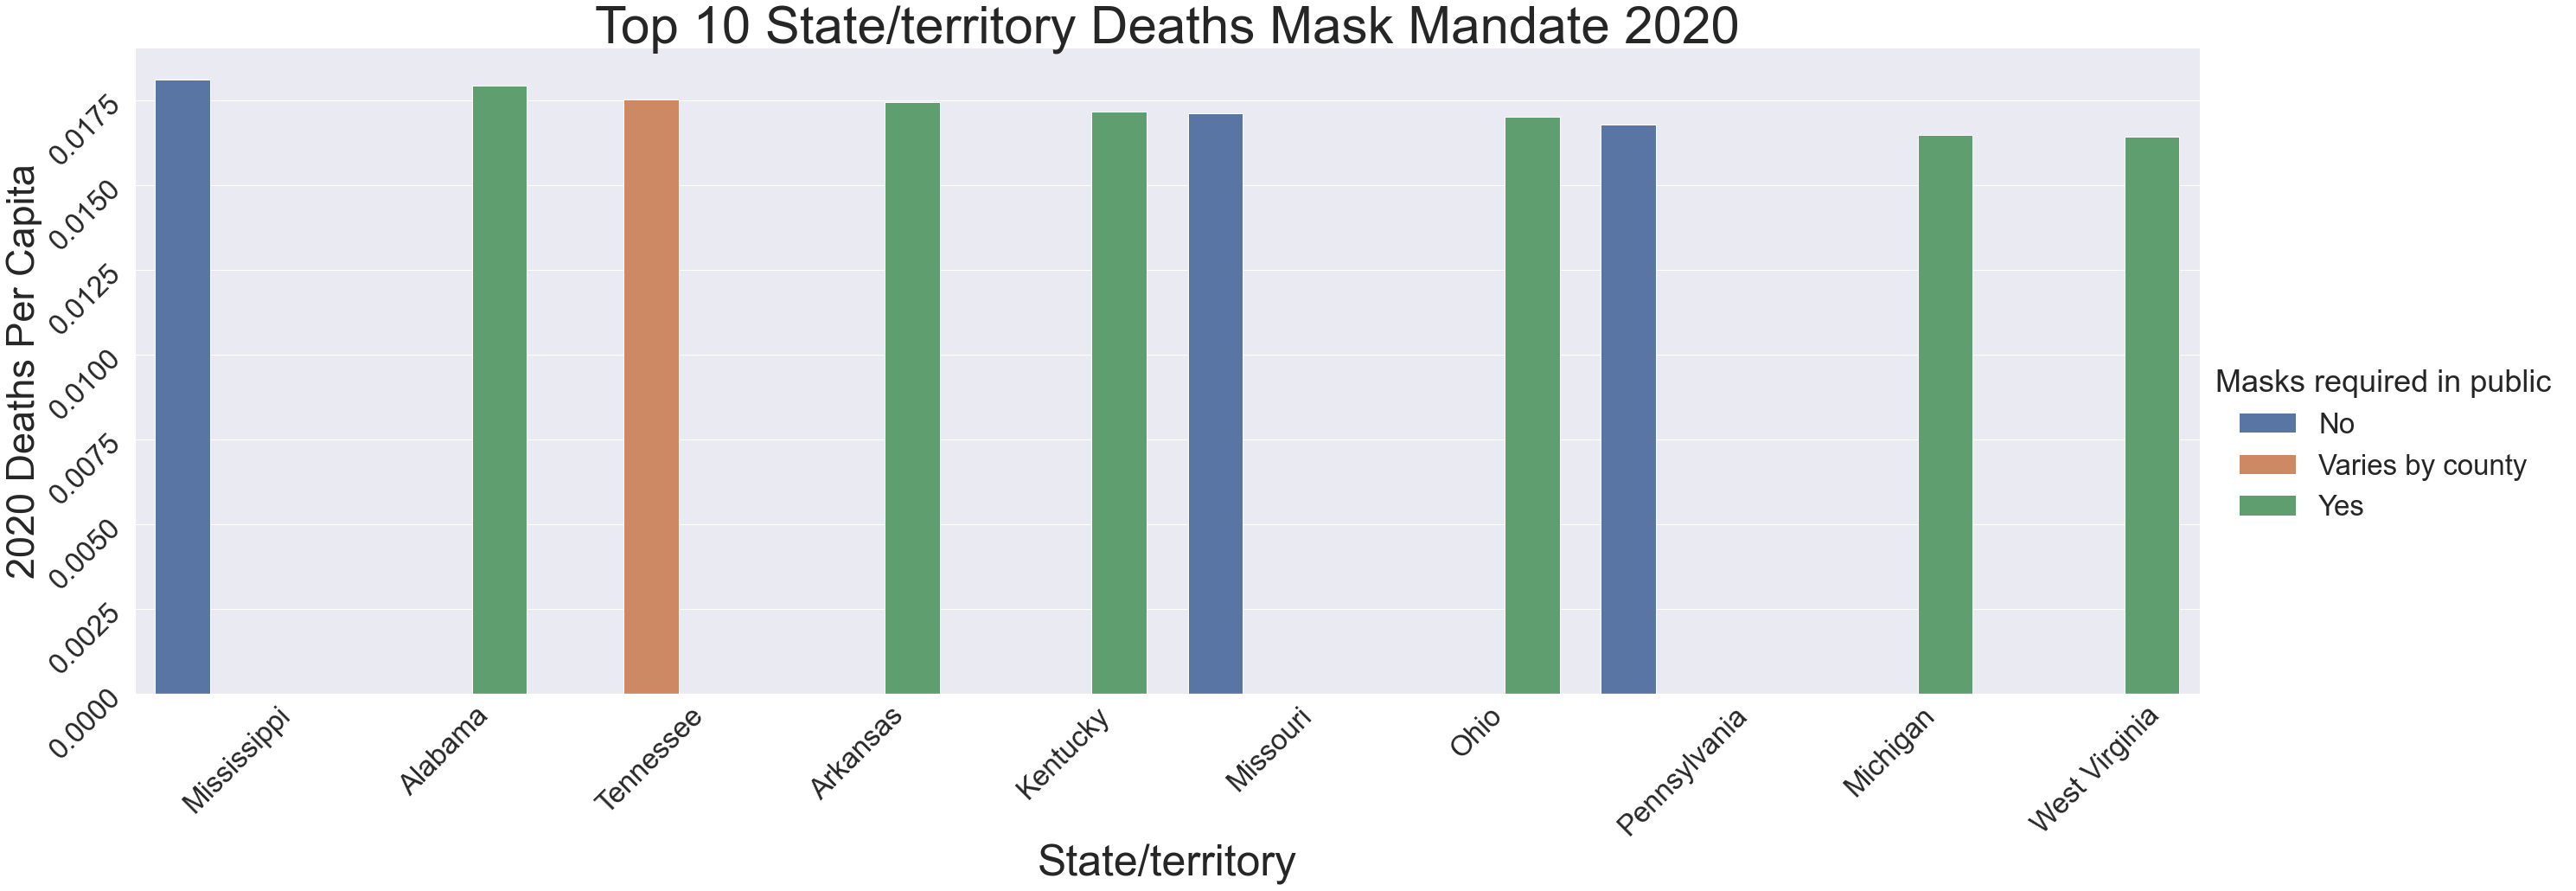

In [58]:
sns.catplot(x='State/territory', y='DeathsPerCapita', hue='Masks required in public', kind='bar', height=12, aspect=3, data=df_lockdown_2020.head(10))
plt.title('Top 10 State/territory Deaths Mask Mandate 2020', size=60)
plt.xlabel('State/territory', size=50)
plt.ylabel('2020 Deaths Per Capita', size=45)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

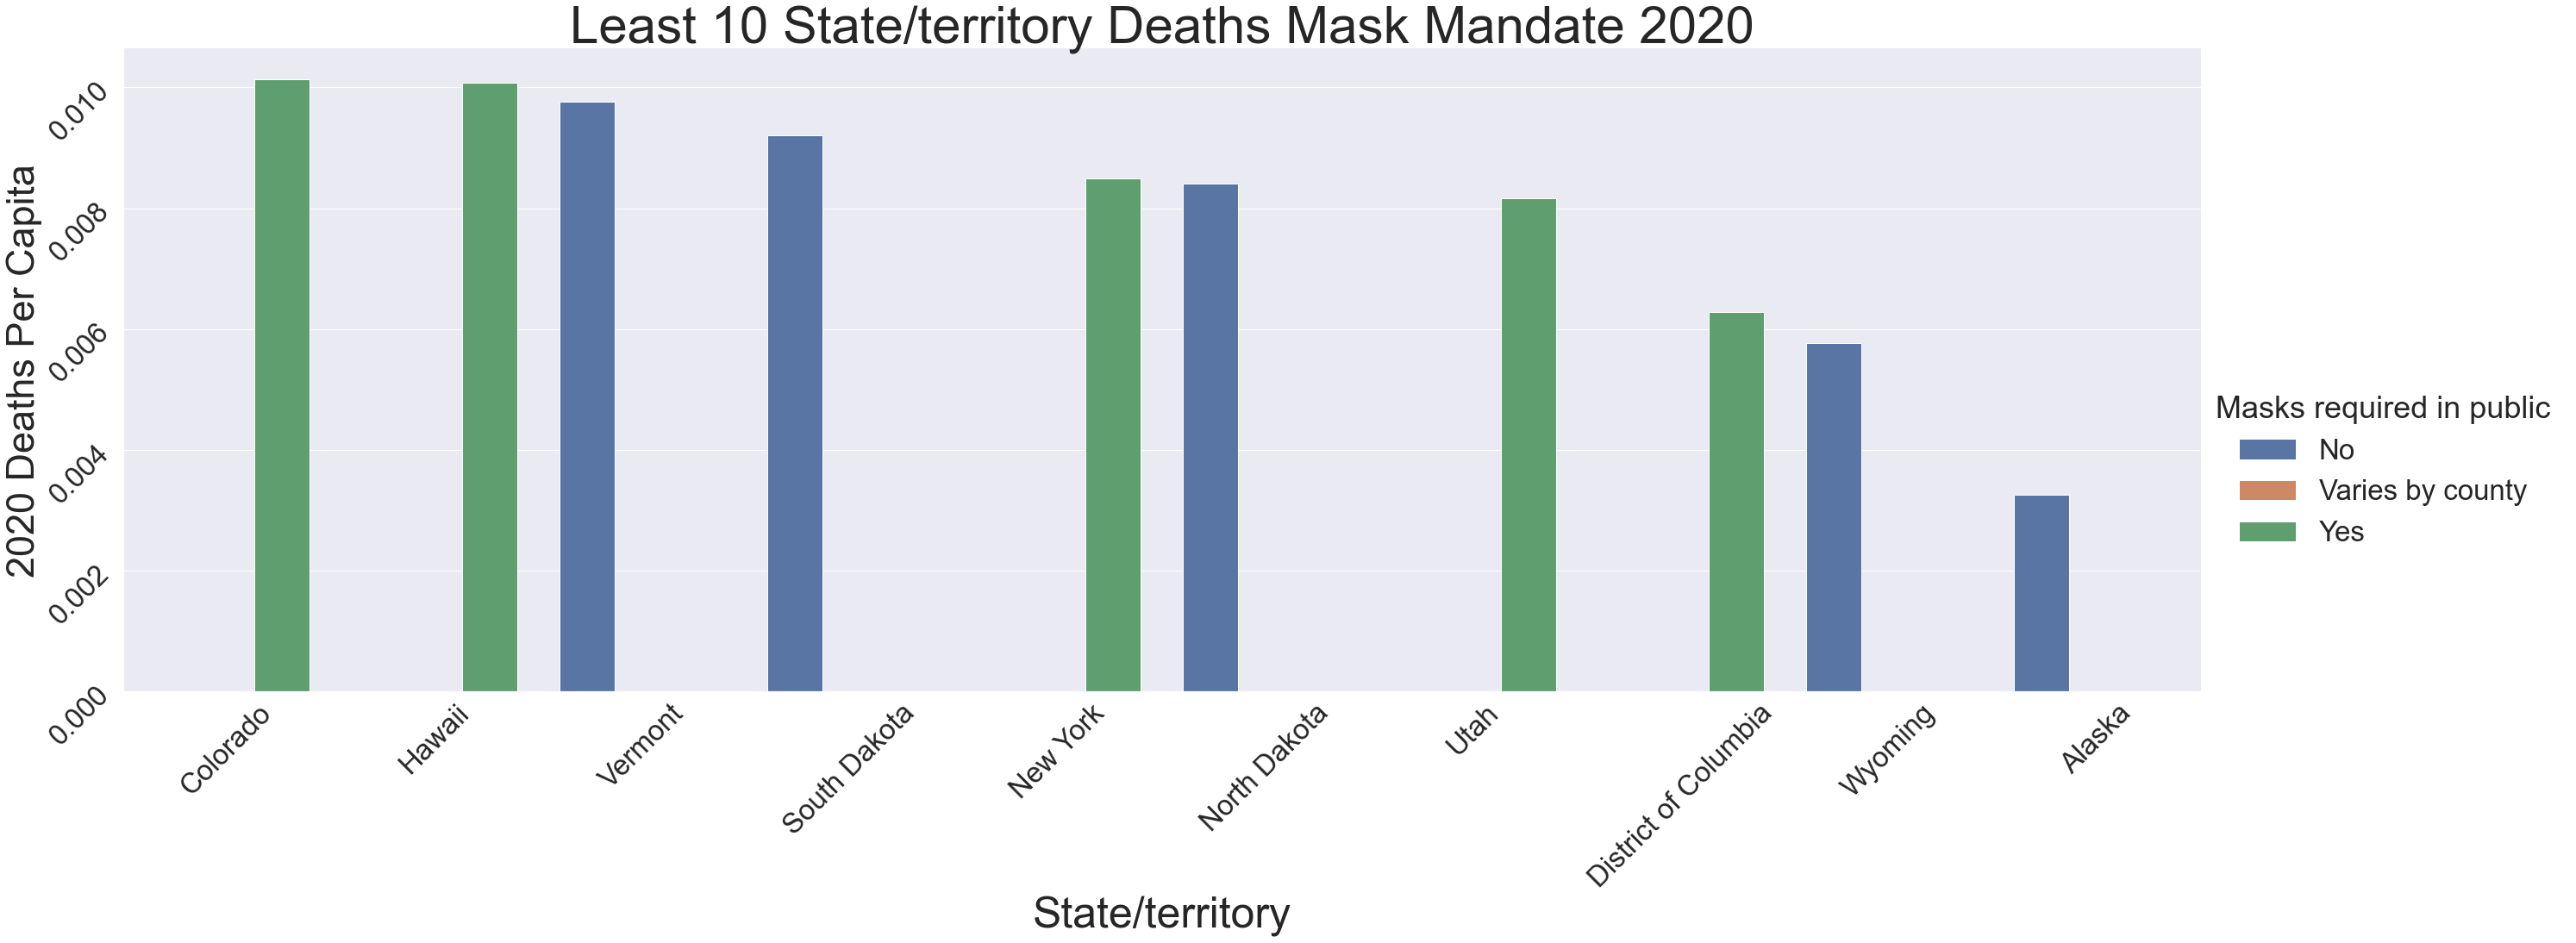

In [59]:
sns.catplot(x='State/territory', y='DeathsPerCapita', hue='Masks required in public', kind='bar', height=12, aspect=3, data=df_lockdown_2020.tail(10))
plt.title('Least 10 State/territory Deaths Mask Mandate 2020', size=60)
plt.xlabel('State/territory', size=50)
plt.ylabel('2020 Deaths Per Capita', size=45)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

From the plots above, we can visualize that masks didn't matter per Deaths Per Capita. Out of the top 10 Deaths Per Capita, 6 of them required masks in public, 3 of them didn't require masks in public, and 1 of them masks in public varied by county. When we look at the least Deaths Per Capita, it is even with 5 requiring masks in public and 5 not requiring masks in public.

Now lets analyze the gathering restriction for Deaths Per Capita

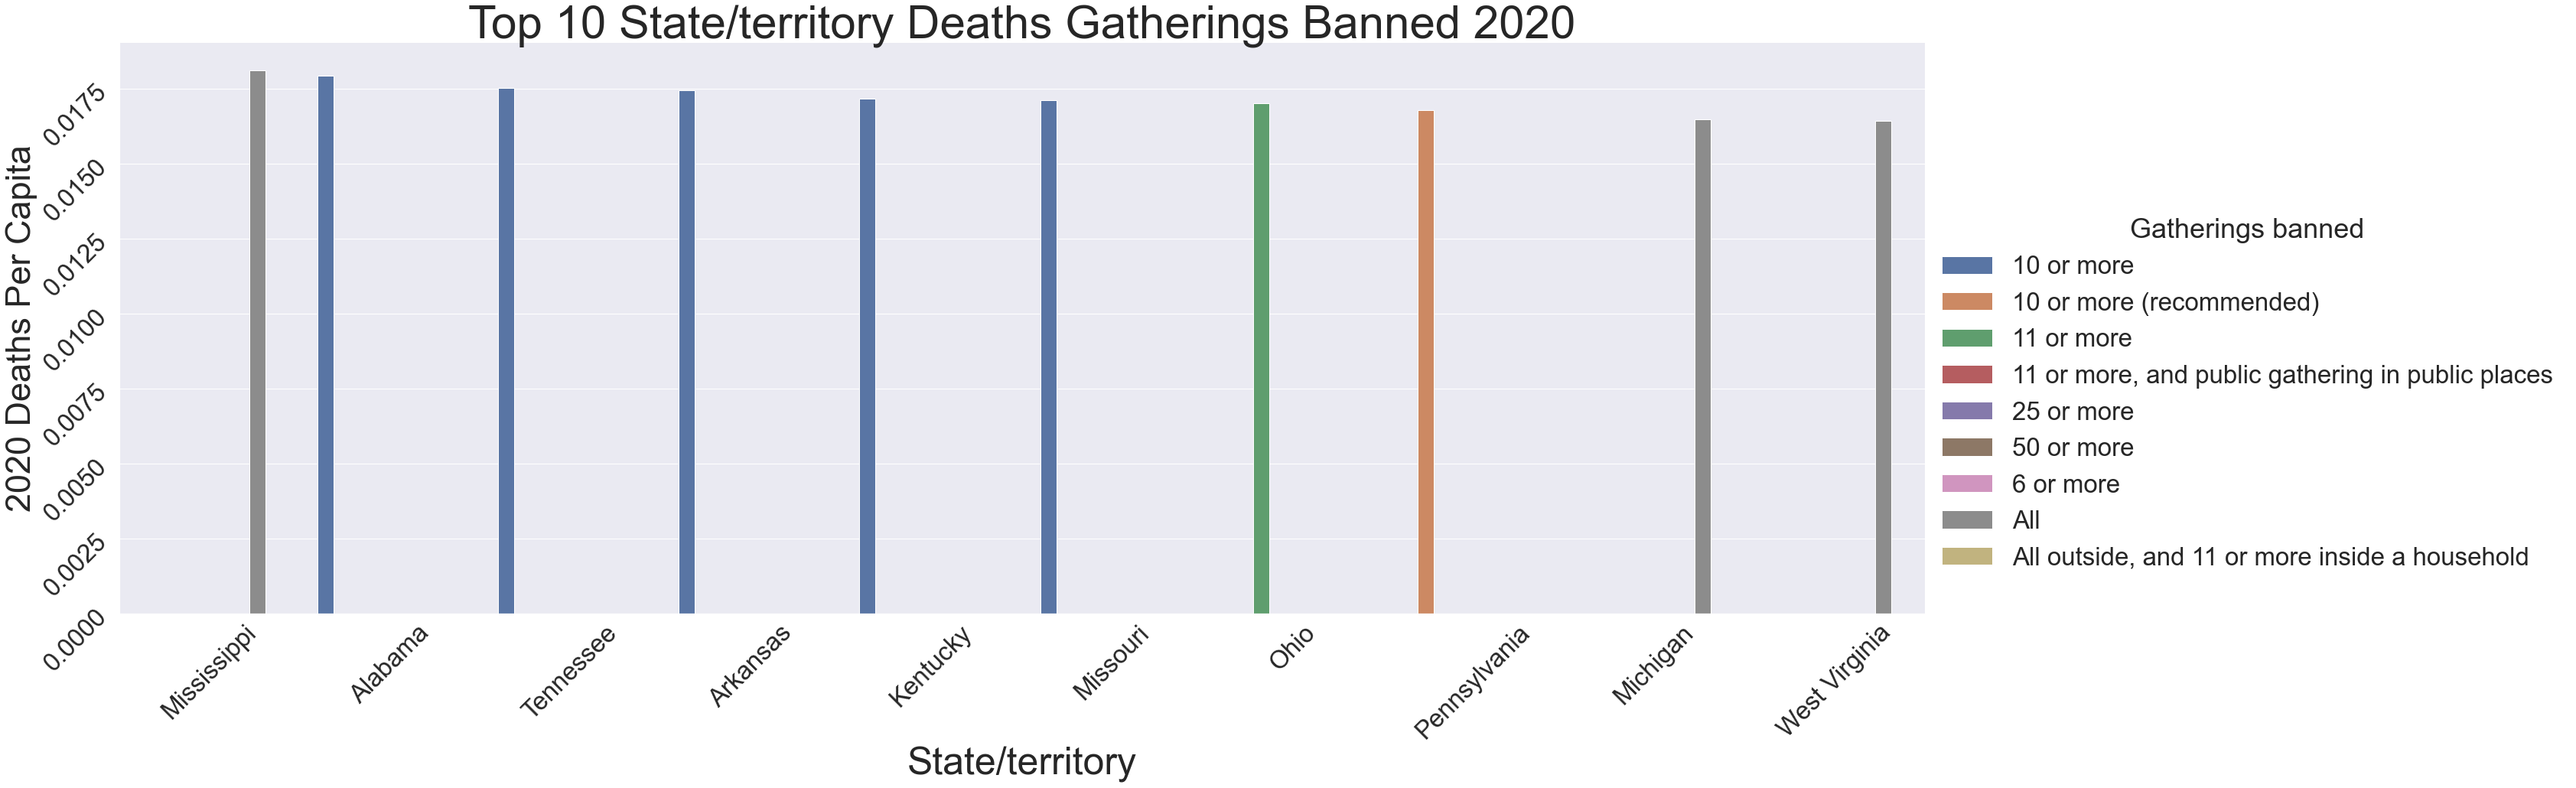

In [60]:
sns.catplot(x='State/territory', y='DeathsPerCapita', hue='Gatherings banned', kind='bar', height=12, aspect=3, data=df_lockdown_2020.head(10))
plt.title('Top 10 State/territory Deaths Gatherings Banned 2020', size=60)
plt.xlabel('State/territory', size=50)
plt.ylabel('2020 Deaths Per Capita', size=45)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

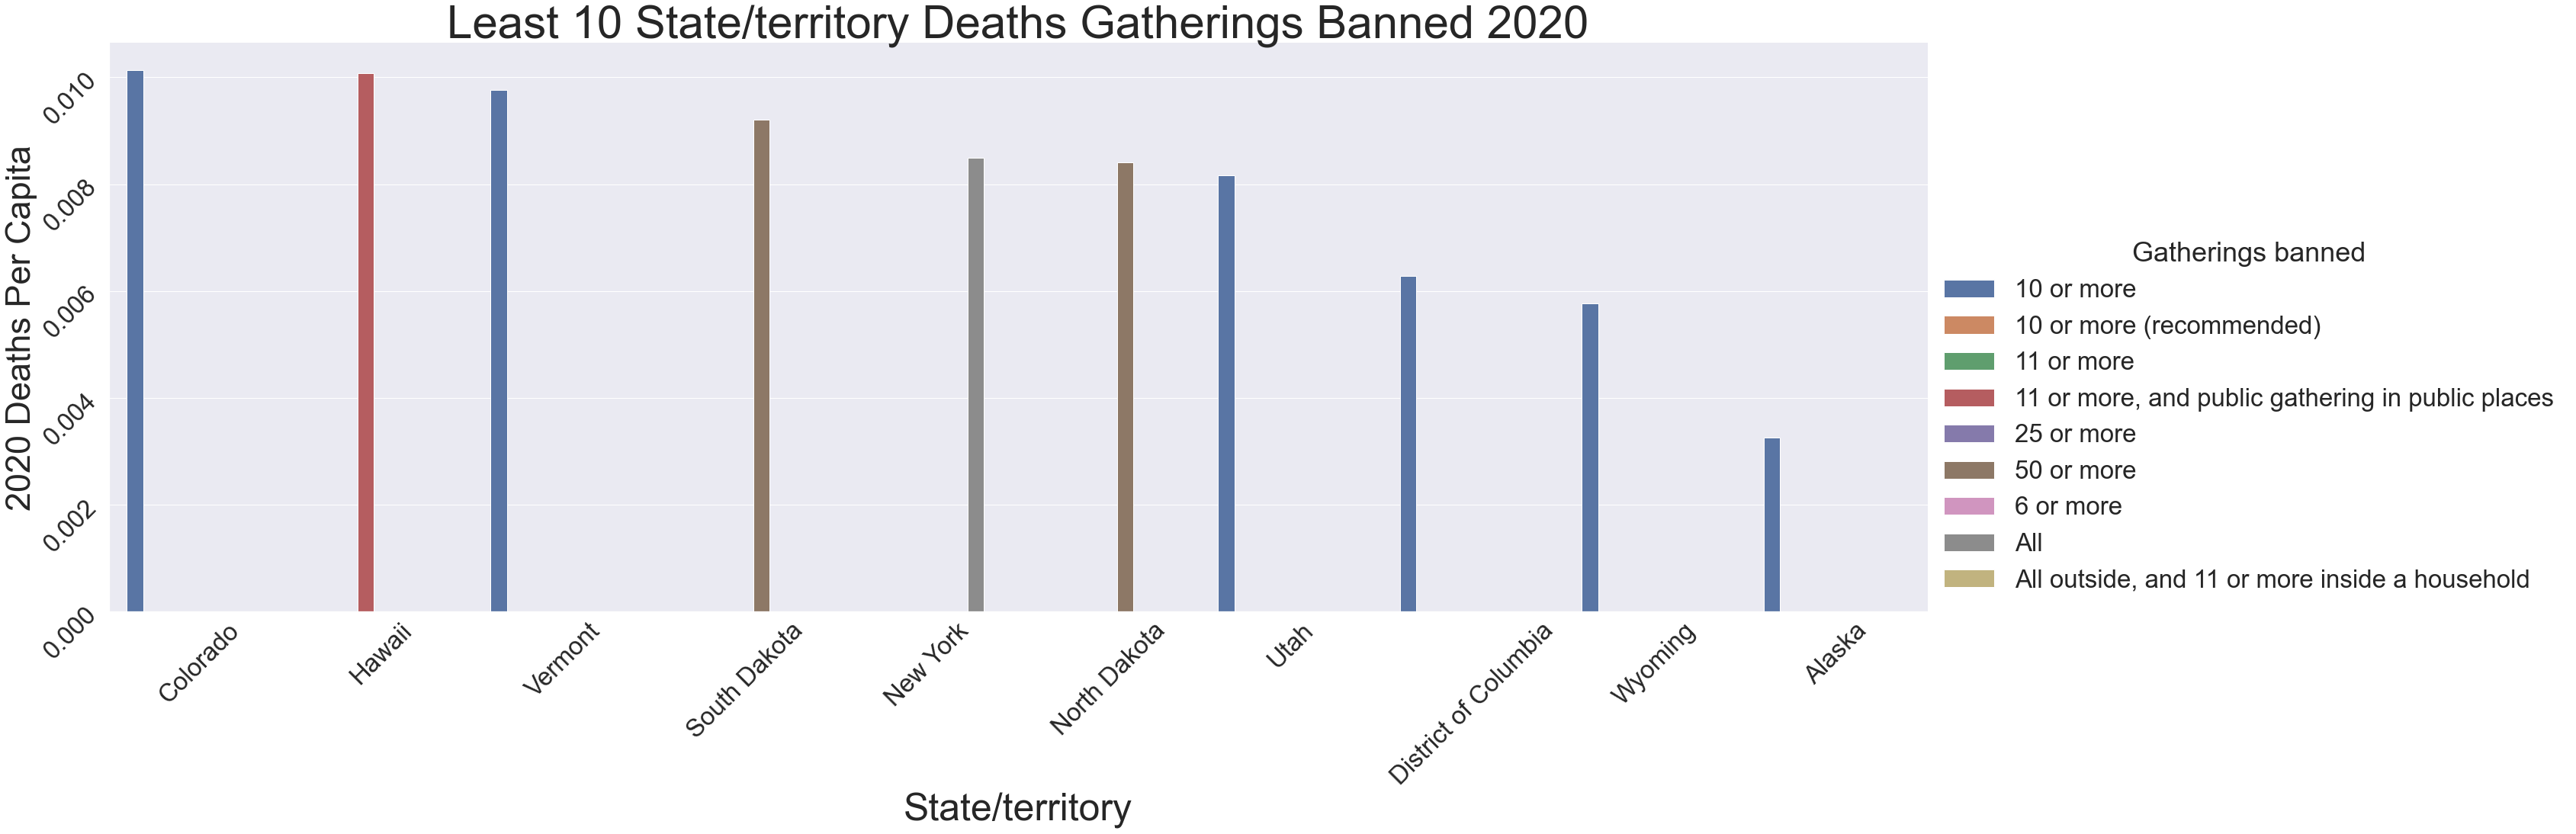

In [61]:
sns.catplot(x='State/territory', y='DeathsPerCapita', hue='Gatherings banned', kind='bar', height=12, aspect=3, data=df_lockdown_2020.tail(10))
plt.title('Least 10 State/territory Deaths Gatherings Banned 2020', size=60)
plt.xlabel('State/territory', size=50)
plt.ylabel('2020 Deaths Per Capita', size=45)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

From the 2 plots above, we can visualize that Gatherings Banned didn't make a difference either. Mississippi banned all gatherings and still had the most deaths per capita for the year 2020.